<a href="https://colab.research.google.com/github/Pauladrea03/supervised-and-unsupervised-learning-project/blob/main/preprocesamiento_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTEGRANTES:**


*   Jose David Martinez
*   Paula Andrea Ortega
*   Isabela Pareja Gil
*   Juliana Rueda Arango







# Librerías

In [ ]:
# Librerías de manipulación de datos
import pandas as pd
import numpy as np

# Opciones de Pandas
pd.set_option('display.max_columns', None)

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display
import plotly.express as px

# Librerías para estadística y pruebas
import scipy.stats as stats
from scipy.stats import gaussian_kde, kstest, norm, shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Librerías de machine learning y preprocesamiento
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Librerías para métricas de modelos
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error, r2_score, classification_report
import math

# Carga de datos

In [ ]:
file_id="1uqi3tElBrgtzjjnQ67mY46TrNWmnDtGw"
df_algebra_vectorial = pd.read_csv(f'https://docs.google.com/uc?export=download&id={file_id}', sep = ';')
del df_algebra_vectorial["Unnamed: 0"]
df_algebra_vectorial.head(10)

,departamento,sexo,edad,direccion,t_familia,padres_status,madre_edu,padre_edu,madre_trab,padre_trab,razon,guardian,t_examen,t_estudio,faltas,soporte_edu_extra,soporte_edu_fam,monitores,actividades_extra,preuniversitario,postgrado,internet,relacion_sen,relacion_fam,tiempo_libre,salir_amigos,cons_alcohol_sem,cons_alcohol_finde,salud,ausencias,nota_01,nota_02,nota_03
0,II,M,18,U,mayor_3,S,4,4,en_casa,profesor,habilidad,madre,2,2,0,si,no,no,no,si,si,no,no,4,3,4,1,1,3,4,0,11,11
1,II,M,17,U,mayor_3,J,1,1,en_casa,otro,habilidad,padre,1,2,0,no,si,no,no,no,si,yes,no,5,3,3,1,1,3,2,9,11,11
2,II,M,15,U,menor_e3,J,1,1,en_casa,otro,otro,madre,1,2,0,si,no,no,no,si,si,yes,no,4,3,2,2,3,3,6,12,13,12
3,II,M,15,U,mayor_3,J,4,2,salud,servicios,recomendacion,madre,1,3,0,no,si,no,si,si,si,yes,yes,3,2,2,1,1,5,0,14,14,14
4,II,M,16,U,mayor_3,J,3,3,otro,otro,recomendacion,padre,1,2,0,no,si,no,no,si,si,no,no,4,3,2,1,2,5,0,11,13,13
5,II,H,16,U,menor_e3,J,4,3,servicios,otro,reputacion,madre,1,2,0,no,si,no,si,si,si,yes,no,5,4,2,1,2,5,6,12,12,13
6,II,H,16,U,menor_e3,J,2,2,otro,otro,recomendacion,madre,1,2,0,no,no,no,no,si,si,yes,no,4,4,4,1,1,3,0,13,12,13
7,II,M,17,U,mayor_3,S,4,4,otro,profesor,recomendacion,madre,2,2,0,si,si,no,no,si,si,no,no,4,1,4,1,1,1,2,10,13,13
8,II,H,15,U,menor_e3,S,3,2,servicios,otro,recomendacion,madre,1,2,0,no,si,no,no,si,si,yes,no,4,2,2,1,1,1,0,15,16,17
9,II,H,15,U,mayor_3,J,3,4,otro,otro,recomendacion,madre,1,2,0,no,si,no,si,si,si,yes,no,5,5,1,1,1,5,0,12,12,13


# Análisis exploratorio y limpieza de datos

*Descripción de los datos*

In [ ]:
def visual_check(df):

    print('Shape:\n',df.shape,'\n')

    print('Data Types:\n', df.dtypes,'\n\n')

    df_colum_duplicated=df.columns.duplicated()
    print("Columnas duplicadas:\n",df_colum_duplicated,'\n\n')

    df_fil_duplicated=df.duplicated()
    print("Filas duplicadas:\n",df_fil_duplicated,'\n\n')

    df_colum_faltantes=df.columns[df.isnull().any()]
    print("Datos faltantes por columnas:\n",df_colum_faltantes,'\n\n')

    display(df.describe().T)

visual_check(df_algebra_vectorial)

Shape:
 (651, 33) 

Data Types:
 departamento          object
sexo                  object
edad                   int64
direccion             object
t_familia             object
padres_status         object
madre_edu              int64
padre_edu              int64
madre_trab            object
padre_trab            object
razon                 object
guardian              object
t_examen               int64
t_estudio              int64
faltas                 int64
soporte_edu_extra     object
soporte_edu_fam       object
monitores             object
actividades_extra     object
preuniversitario      object
postgrado             object
internet              object
relacion_sen          object
relacion_fam           int64
tiempo_libre           int64
salir_amigos           int64
cons_alcohol_sem       int64
cons_alcohol_finde     int64
salud                  int64
ausencias              int64
nota_01                int64
nota_02                int64
nota_03                int64
dtype: obj

,count,mean,std,min,25%,50%,75%,max
edad,651.0,16.745008,1.217609,15.0,16.0,17.0,18.0,22.0
madre_edu,651.0,2.516129,1.134481,0.0,2.0,2.0,4.0,4.0
padre_edu,651.0,2.308756,1.100308,0.0,1.0,2.0,3.0,4.0
t_examen,651.0,1.569892,0.747889,1.0,1.0,1.0,2.0,4.0
t_estudio,651.0,1.930876,0.828241,1.0,1.0,2.0,2.0,4.0
faltas,651.0,0.221198,0.592449,0.0,0.0,0.0,0.0,3.0
relacion_fam,651.0,3.930876,0.954253,1.0,4.0,4.0,5.0,5.0
tiempo_libre,651.0,3.181260,1.049990,1.0,3.0,3.0,4.0,5.0
salir_amigos,651.0,3.187404,1.174824,1.0,2.0,3.0,4.0,5.0
cons_alcohol_sem,651.0,1.500768,0.923830,1.0,1.0,1.0,2.0,5.0


La base de datos está compuesta por 651 filas y 33 columnas, de las cuales encontramos algunas numéricas y categóricas (como object).

En este caso se observan dos filas duplicadas, sin embargo la base de datos no incluye un identificador por persona, por lo tanto no es posible conocer si realmente se está repitiendo la misma persona. No se eliminan los duplicados bajo el supuesto de que pueden existir dos personas con el mismo registro de datos en esta base.

La base de datos no presenta faltantes.

### **Análisis univariado**

#### ***1. Variables númericas***

In [ ]:
#Conocer los valores que tienen las variables numéricas
numerical_columns = df_algebra_vectorial.select_dtypes(include=['number'])

for column in numerical_columns:
    unique_values = numerical_columns[column].unique()
    print(f"Valores únicos en la columna '{column}':")
    print(unique_values)
    print("\n")

Valores únicos en la columna 'edad':
[18 17 15 16 19 22 20 21]


Valores únicos en la columna 'madre_edu':
[4 1 3 2 0]


Valores únicos en la columna 'padre_edu':
[4 1 2 3 0]


Valores únicos en la columna 't_examen':
[2 1 3 4]


Valores únicos en la columna 't_estudio':
[2 3 1 4]


Valores únicos en la columna 'faltas':
[0 3 1 2]


Valores únicos en la columna 'relacion_fam':
[4 5 3 1 2]


Valores únicos en la columna 'tiempo_libre':
[3 2 4 1 5]


Valores únicos en la columna 'salir_amigos':
[4 3 2 1 5]


Valores únicos en la columna 'cons_alcohol_sem':
[1 2 5 3 4]


Valores únicos en la columna 'cons_alcohol_finde':
[1 3 2 4 5]


Valores únicos en la columna 'salud':
[3 5 1 2 4]


Valores únicos en la columna 'ausencias':
[ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3]


Valores únicos en la columna 'nota_01':
[ 0  9 12 14 11 13 10 15 17  8 16 18  7  6  5  4 19]


Valores únicos en la columna 'nota_02':
[11 13 14 12 16 17  8 10 15  9  7  6 18 19  0  5]


Val

Se considera que hay variables númericas que realmente representan categorías, por lo cual se realiza la respectiva conversión de las siguientes variables:

*  *relacion_fam*
*  *salud*
*  *tiempo_libre*
*  *salir_amigos*
*  *cons_alcohol_sem*
*  *cons_alcohol_finde*
*  *madre_edu*
*  *padre_edu*
*  *t_examen*
*  *t_estudio*

Adicionalmente, a las variables *'internet'* y *'relacion_sen'* se les ajustó el valor de 'yes' a 'si'. Finalmente, la variable *'faltas'*, con valores entre 0 y 3, se reacondicionó para que cumpliera con su definición, expedida en el diccionario de variables: **n si 1<=n<3, si no 4**, los valores de 0 se reemplazaron por 4.


In [ ]:
#Conversión de las variable núméricas a categóricas

def cambio_categoria(df):
    categoricas_1 =['relacion_fam', 'salud']
    categoricas_2 = ['tiempo_libre', 'salir_amigos', 'cons_alcohol_sem', 'cons_alcohol_finde']

    conversion_1 = {
        1: 'Muy malo',
        2: 'Malo',
        3: 'Regular',
        4: 'Bueno',
        5: 'Excelente'
    }
    conversion_2 = {
        1: 'Muy bajo',
        2: 'Bajo',
        3: 'Medio',
        4: 'Alto',
        5: 'Muy alto'
    }
    conversion_padres_edu = {
        0: 'Ninguno',
        1: 'Primaria hasta 5°',
        2: '6° a 9°',
        3: '10° a 11°',
        4: 'Educación superior'
    }
    conversion_t_examen = {
        1: '< 15 min',
        2: '15 a 30 min',
        3: '30 min a 1 hora',
        4: '> 1 hora'
    }
    conversion_t_estudio = {
        1: '< 2 horas',
        2: '2 a 5 horas',
        3: '5 a 10 horas',
        4: '> 10 horas'
    }
    conversion_yes = {
        'yes': 'si'
    }

    for col in df.columns:
        if col in categoricas_1:
            df[col] = df[col].replace(conversion_1)
        elif col in categoricas_2:
            df[col]= df[col].replace(conversion_2)
        elif col == 'madre_edu' or col =='padre_edu':
            df[col]= df[col].replace(conversion_padres_edu)
        elif col == 't_examen':
            df[col] = df[col].replace(conversion_t_examen)
        elif col == 't_estudio':
            df[col] = df[col].replace(conversion_t_estudio)
        elif col == 'internet' or col == 'relacion_sen':
            df[col] = df[col].replace(conversion_yes)
        elif col == 'faltas':
            df[col] = df[col].replace(0, 4)
        elif col == 'departamento':
            df[col] = df[col].replace('MS', 'IS')

    return df

df_algebra_vectorial = cambio_categoria(df_algebra_vectorial)
df_algebra_vectorial.head()

,departamento,sexo,edad,direccion,t_familia,padres_status,madre_edu,padre_edu,madre_trab,padre_trab,razon,guardian,t_examen,t_estudio,faltas,soporte_edu_extra,soporte_edu_fam,monitores,actividades_extra,preuniversitario,postgrado,internet,relacion_sen,relacion_fam,tiempo_libre,salir_amigos,cons_alcohol_sem,cons_alcohol_finde,salud,ausencias,nota_01,nota_02,nota_03
0,II,M,18,U,mayor_3,S,Educación superior,Educación superior,en_casa,profesor,habilidad,madre,15 a 30 min,2 a 5 horas,4,si,no,no,no,si,si,no,no,Bueno,Medio,Alto,Muy bajo,Muy bajo,Regular,4,0,11,11
1,II,M,17,U,mayor_3,J,Primaria hasta 5°,Primaria hasta 5°,en_casa,otro,habilidad,padre,< 15 min,2 a 5 horas,4,no,si,no,no,no,si,si,no,Excelente,Medio,Medio,Muy bajo,Muy bajo,Regular,2,9,11,11
2,II,M,15,U,menor_e3,J,Primaria hasta 5°,Primaria hasta 5°,en_casa,otro,otro,madre,< 15 min,2 a 5 horas,4,si,no,no,no,si,si,si,no,Bueno,Medio,Bajo,Bajo,Medio,Regular,6,12,13,12
3,II,M,15,U,mayor_3,J,Educación superior,6° a 9°,salud,servicios,recomendacion,madre,< 15 min,5 a 10 horas,4,no,si,no,si,si,si,si,si,Regular,Bajo,Bajo,Muy bajo,Muy bajo,Excelente,0,14,14,14
4,II,M,16,U,mayor_3,J,10° a 11°,10° a 11°,otro,otro,recomendacion,padre,< 15 min,2 a 5 horas,4,no,si,no,no,si,si,no,no,Bueno,Medio,Bajo,Muy bajo,Bajo,Excelente,0,11,13,13


**Análisis exploratorio**

In [ ]:
numerical_columns = df_algebra_vectorial.select_dtypes(include=['number'])

for column in numerical_columns:
    unique_values = numerical_columns[column].unique()
    print(f"Valores únicos en la columna '{column}':")
    print(unique_values)
    print("\n")

Valores únicos en la columna 'edad':
[18 17 15 16 19 22 20 21]


Valores únicos en la columna 'faltas':
[4 3 1 2]


Valores únicos en la columna 'ausencias':
[ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3]


Valores únicos en la columna 'nota_01':
[ 0  9 12 14 11 13 10 15 17  8 16 18  7  6  5  4 19]


Valores únicos en la columna 'nota_02':
[11 13 14 12 16 17  8 10 15  9  7  6 18 19  0  5]


Valores únicos en la columna 'nota_03':
[11 12 14 13 17 15  7 10 16  9  8 18  6  0  1  5 19]





*   La columna edad presenta valores entre 15 y 22 años.
*   Se encuentran faltas entre 1 y 3, el valor 4 hace alusión a faltas que no se encuentran entre el rango 1-3.
*   Ausencias tiene valores entre 0 y 30.
*   nota_01, nota_2 y nota_3 tienen valores entre 0 y 19.

***Análisis univariado con gráficos***

In [ ]:
def num_vis(df):
    numeric_columns = df.select_dtypes(include='number').columns
    n_cols = 3
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
    fig_hist = make_subplots(n_rows, n_cols, subplot_titles=[f'Histograma {column}' for column in numeric_columns],shared_yaxes=True)
    for i, column in enumerate(numeric_columns):
        hist=go.Histogram(x=df[column], name=f'Histograma {column}',nbinsx=30,opacity=0.75,marker=dict(color='blue',line=dict(color='black',width=1)))
        fig_hist.add_trace(hist,row=(i//n_cols)+1, col=(i % n_cols)+1)
    fig_hist.update_layout(height=300 * n_rows, width=800, title_text="Histogramas variables numéricas")
    fig_hist.show()

num_vis(df_algebra_vectorial)

La variable independiente edad tiene una mayor concentración de valores entre 0 y 19 años, es decir, las personas entre 0 y 19 son la población más grande encontrada en la materia álgebra vectorial. Por otro lado, es notable que la variable faltas tiene un gran desbalance en sus valores, pues la mayoría de estudiantes presentan 4 faltas. En Ausencias se identifica que solo pocos estudiantes se han ausentado más de 11 veces aproximadamente. Las notas presentan mayor acumulación, entre 8 y 15 aproximadamente, es decir, la mayoría de los estudiantes consiguen notas entre este rango.

#### ***2. Variables categoricas***

In [ ]:
def cat_summary(df, cat, plot=False):
    print(pd.DataFrame({cat: df[cat].value_counts(),
                        'Ratio': 100 * df[cat].value_counts() / len(df)}))
    print('##########################################')
    if plot:
        plt.figure(figsize=(12,6))
        sns.countplot(x=df[cat], data=df)
        plt.show(block=True)

cat_cols = [col for col in df_algebra_vectorial.columns if df_algebra_vectorial[col].dtypes == "O"]
for col in cat_cols:
    cat_summary(df_algebra_vectorial, col, plot=False)

              departamento      Ratio
departamento                         
II                     424  65.130568
IS                     227  34.869432
##########################################
      sexo      Ratio
sexo                 
M      385  59.139785
H      266  40.860215
##########################################
           direccion      Ratio
direccion                      
U                453  69.585253
R                198  30.414747
##########################################
           t_familia      Ratio
t_familia                      
mayor_3          459  70.506912
menor_e3         192  29.493088
##########################################
               padres_status      Ratio
padres_status                          
J                        570  87.557604
S                         81  12.442396
##########################################
                    madre_edu      Ratio
madre_edu                               
6° a 9°                   187  28.725038
Educac

La base de datos contiene 25 variables categóricas, de las cuales se realizan las siguientes observaciones.

* La educación que los padres y madres de los estudiantes del curso recibieron, fue mayoritariamente de 6° a 9°, resaltando que fueron las mujeres quienes recibieron más educación superior con un 27%. Por otro lado, en cuanto al ámbito laboral se destaca la categoría otros, sin embargo, son las mujeres las que más permanecen en el hogar, lo que podría explicar el porqué las madres son el guardian designado con mayor proporción. El 87% de las parejas padres de familia del curso, se encuentran en unión.

*  Un 47% de los estudiantes dedican de 2 a 5 horas de estudio, y la mayoría no tienen monitores para clases extra. En cuanto a actividades extracurriculares, los estudiantes se encuentran repartidos en casi que iguales proporciones, ganando que no realizan actividades extra por un 2.92.

* Así como el tiempo de estudio parece ser medio, los estudiantes tienen una vida social o salidas con amigos también de frecuencia media o baja, lo que también se refleja en la cantidad de estudiantes con pareja sentimental, pues un 63% no posee. Es importante destacar que el consumo de alcohol de los estudiantes es muy bajo, tanto en semana como el fin de semana.

* La salud de los estudiantes refleja que la mayoría tiene entre medio y excelente condición, lo que podría tener relación con el bajo consumo de alcohol presentado.

**Análisis univariado con gráficos**

En este análisis gráfico, debido a la extensividad de las variables categóricas, se seleccionan tres tipos de gráficos diferentes, elegidos según la mejor visualización que podría tener la categoría.

In [ ]:
fig = make_subplots(rows=2, cols=4,
                    subplot_titles=("<b>Relación Familiar<b>",
                                    "<b>Trabajo del Padre<b>",
                                    "<b>Trabajo de la Madre<b>",
                                    "<b>Tiempo libre después<br>de la universidad<b>",
                                    "<b>Consumo de alcohol<br>en jornada laboral<b>",
                                    "<b>Consumo de alcohol<br>en fin de semana<b>",
                                    "<b>Estado de salud actual<b>",
                                    "<b>Salir amigos<b>"))

# Datos para 'relacion_fam'
base_relacion_fam = df_algebra_vectorial.groupby(['relacion_fam'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir líneas y puntos para 'relacion_fam'
for i, row in base_relacion_fam.iterrows():
    fig.add_shape(type='line', x0=0, y0=i, x1=row['count'], y1=i,
                  line=dict(color='skyblue', width=2), row=1, col=1)
fig.add_trace(go.Scatter(x=base_relacion_fam['count'], y=base_relacion_fam.index,
                         mode='markers', marker=dict(color='darkblue', size=10),
                         showlegend=False), row=1, col=1)
fig.update_yaxes(tickvals=base_relacion_fam.index, ticktext=base_relacion_fam['relacion_fam'], row=1, col=1)

# Datos para 'padre_trab'
base_padre_trab = df_algebra_vectorial.groupby(['padre_trab'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir líneas y puntos para 'padre_trab'
for i, row in base_padre_trab.iterrows():
    fig.add_shape(type='line', x0=0, y0=i, x1=row['count'], y1=i,
                  line=dict(color='skyblue', width=2), row=1, col=2)
fig.add_trace(go.Scatter(x=base_padre_trab['count'], y=base_padre_trab.index,
                         mode='markers', marker=dict(color='darkblue', size=10),
                         showlegend=False), row=1, col=2)
fig.update_yaxes(tickvals=base_padre_trab.index, ticktext=base_padre_trab['padre_trab'], row=1, col=2)

# Datos para 'madre_trab'
base_madre_trab = df_algebra_vectorial.groupby(['madre_trab'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir líneas y puntos para 'madre_trab'
for i, row in base_madre_trab.iterrows():
    fig.add_shape(type='line', x0=0, y0=i, x1=row['count'], y1=i,
                  line=dict(color='skyblue', width=2), row=1, col=3)
fig.add_trace(go.Scatter(x=base_madre_trab['count'], y=base_madre_trab.index,
                         mode='markers', marker=dict(color='darkblue', size=10),
                         showlegend=False), row=1, col=3)
fig.update_yaxes(tickvals=base_madre_trab.index, ticktext=base_madre_trab['madre_trab'], row=1, col=3)


# Datos para 'tiempo_libre'
base_tiempo_libre = df_algebra_vectorial.groupby(['tiempo_libre'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir líneas y puntos para 'tiempo_libre'
for i, row in base_tiempo_libre.iterrows():
    fig.add_shape(type='line', x0=0, y0=i, x1=row['count'], y1=i,
                  line=dict(color='skyblue', width=2), row=1, col=4)
fig.add_trace(go.Scatter(x=base_tiempo_libre['count'], y=base_tiempo_libre.index,
                         mode='markers', marker=dict(color='darkblue', size=10),
                         showlegend=False), row=1, col=4)
fig.update_yaxes(tickvals=base_tiempo_libre.index, ticktext=base_tiempo_libre['tiempo_libre'], row=1, col=4)

# Datos para 'cons_alcohol_sem'
base_cons_alcohol_sem = df_algebra_vectorial.groupby(['cons_alcohol_sem'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir líneas y puntos para 'cons_alcohol_sem'
for i, row in base_cons_alcohol_sem.iterrows():
    fig.add_shape(type='line', x0=0, y0=i, x1=row['count'], y1=i,
                  line=dict(color='skyblue', width=2), row=2, col=1)
fig.add_trace(go.Scatter(x=base_cons_alcohol_sem['count'], y=base_cons_alcohol_sem.index,
                         mode='markers', marker=dict(color='darkblue', size=10),
                         showlegend=False), row=2, col=1)
fig.update_yaxes(tickvals=base_cons_alcohol_sem.index, ticktext=base_cons_alcohol_sem['cons_alcohol_sem'], row=2, col=1)

# Datos para 'cons_alcohol_finde'
base_cons_alcohol_finde = df_algebra_vectorial.groupby(['cons_alcohol_finde'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir líneas y puntos para 'cons_alcohol_finde'
for i, row in base_cons_alcohol_finde.iterrows():
    fig.add_shape(type='line', x0=0, y0=i, x1=row['count'], y1=i,
                  line=dict(color='skyblue', width=2), row=2, col=2)
fig.add_trace(go.Scatter(x=base_cons_alcohol_finde['count'], y=base_cons_alcohol_finde.index,
                         mode='markers', marker=dict(color='darkblue', size=10),
                         showlegend=False), row=2, col=2)
fig.update_yaxes(tickvals=base_cons_alcohol_finde.index, ticktext=base_cons_alcohol_finde['cons_alcohol_finde'], row=2, col=2)

# Datos para 'salud'
base_salud = df_algebra_vectorial.groupby(['salud'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir líneas y puntos para 'salud'
for i, row in base_salud.iterrows():
    fig.add_shape(type='line', x0=0, y0=i, x1=row['count'], y1=i,
                  line=dict(color='skyblue', width=2), row=2, col=3)
fig.add_trace(go.Scatter(x=base_salud['count'], y=base_salud.index,
                         mode='markers', marker=dict(color='darkblue', size=10),
                         showlegend=False), row=2, col=3)
fig.update_yaxes(tickvals=base_salud.index, ticktext=base_salud['salud'], row=2, col=3)

# Datos para 'salir_amigos'
base_salir_amigos = df_algebra_vectorial.groupby(['salir_amigos'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir líneas y puntos para 'salir_amigos'
for i, row in base_salir_amigos.iterrows():
    fig.add_shape(type='line', x0=0, y0=i, x1=row['count'], y1=i,
                  line=dict(color='skyblue', width=2), row=2, col=4)
fig.add_trace(go.Scatter(x=base_salir_amigos['count'], y=base_salir_amigos.index,
                         mode='markers', marker=dict(color='darkblue', size=10),
                         showlegend=False), row=2, col=4)
fig.update_yaxes(tickvals=base_salir_amigos.index, ticktext=base_salir_amigos['salir_amigos'], row=2, col=4)


# Personalización de la figura
fig.update_layout(height=800, width=1500)

# Mostrar el gráfico
fig.show()

Para este tipo de gráfica de lollipop, donde el eje x es la cantidad de estudiantes y el eje y la categoría, se encuentra que:

* El consumo de alcohol en jornada laboral es muy bajo con 453 estudiantes, sin embargo los fines de semana solo 249 clasifican como muy bajo.

* La misma cantidad de madres trabaja en servicios o se queda en casa, mientras que en los padres solo 42 se quedan en casa.

* El tiempo libre después de la universidad, para los estudiantes, es medio, así como sus salidas con amigo.

* La relación familiar es generalmente buena en los hogares de los estudiantes.

In [ ]:
# Crear la figura con subplots y especificar el número de filas y columnas
fig = make_subplots(rows=3, cols=3, subplot_titles=(
        "<b>% de estudiantes que tienen<br>una relación romántica<b>",
        "<b>% de estudiantes que tienen<br>acceso a internet en casa<b>",
        "<b>% de estudiantes que quieren<br>realizar postgrado<b>",
        "<b>% de estudiantes que asistieron<br>a preuniversitario<b>",
        "<b>% de estudiantes que participan<br>en actividades extraescolares<b>",
        "<b>% de estudiantes que tienen clases<br>extras pagadas por tutores privados<b>",
        "<b>% de estudiantes que tienen<br>apoyo educativo familiar<b>",
        "<b>% de estudiantes que tienen<br>apoyo educativo adicional<b>"
    ),
    specs=[[{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}],
     [{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}],
      [{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}]],
    vertical_spacing=0.15,
    horizontal_spacing=0.1)

# Definir los gráficos de torta y añadirlos a los subplots

# Gráfico 1: Relación romántica
base = df_algebra_vectorial.groupby(['relacion_sen'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='relacion_sen',hole=.5).data[0], row=1, col=1)

# Gráfico 2: Acceso a internet en casa
base = df_algebra_vectorial.groupby(['internet'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='internet',hole=.5).data[0], row=1, col=2)

# Gráfico 3: Quieren realizar postgrado
base = df_algebra_vectorial.groupby(['postgrado'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='postgrado', hole=.5).data[0], row=1, col=3)

# Gráfico 4: Asistencia a preuniversitario
base = df_algebra_vectorial.groupby(['preuniversitario'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='preuniversitario',hole=.5).data[0], row=2, col=1)

# Gráfico 5: Actividades extraescolares
base = df_algebra_vectorial.groupby(['actividades_extra'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='actividades_extra',hole=.5).data[0], row=2, col=2)

# Gráfico 6: Clases extras pagadas por tutores privados
base = df_algebra_vectorial.groupby(['monitores'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='monitores',hole=.5).data[0], row=2, col=3)

# Gráfico 7: Apoyo educativo familiar
base = df_algebra_vectorial.groupby(['soporte_edu_fam'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='soporte_edu_fam',hole=.5).data[0], row=3, col=1)

# Gráfico 8: Apoyo educativo adicional
base = df_algebra_vectorial.groupby(['soporte_edu_extra'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='soporte_edu_extra',hole=.5).data[0], row=3, col=2)

# Personalizar el diseño de la figura
fig.update_layout(height=1000, width=1500, template='simple_white')

# Mostrar la figura
fig.show()

Para las variables binarias se eligió un gráfico de pie, pues permite una mejor visualización de porcentajes y la proporción de las respuestas.

* Aunque el 84% de los estudiantes no tienen un soporte educativo adicional, la mayoría sí tiene soporte educativo familiar, lo que podría estar relacionado a la buena relación familiar.

* Es importante destacar que casi el 90% de los estudiantes quisieran estudiar un posgrado al finalizar la carrera.

* Para entrar a la universidad, la mayoría de los estudiantes optaron por realizar un preuniversitario.

In [ ]:
fig = make_subplots(
    rows=3, cols=4,
    subplot_titles=(
        "<b>Tutor del estudiante<b>",
        "<b>Razón para elegir la carrera<b>",
        "<b>Sexo del estudiante<b>",
        "<b>Tamaño de la familia<b>",
        "<b>Dirección<b>",
        "<b>Tiempo de estudio semanal<b>",
        "<b>Tiempo que demoró en<br>realizar el primer examen<b>",
        "<b>Departamento<b>",
        "<b>Educacion del padre<b>",
        "<b>Educación de la madre<b>",
        "<b>Estado de convivencia<br>de los padres<b>"
    ),
    vertical_spacing=0.25,
    horizontal_spacing=0.1
)

# Gráfico 1: Tutor del estudiante
base = df_algebra_vectorial.groupby(['guardian'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar1 = px.bar(base, x='guardian', y='count', barmode='group')
for trace in fig_bar1.data:
    fig.add_trace(trace, row=1, col=1)

# Gráfico 2: Razón para elegir la carrera
base = df_algebra_vectorial.groupby(['razon'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar2 = px.bar(base, x='razon', y='count', barmode='group')
for trace in fig_bar2.data:
    fig.add_trace(trace, row=1, col=2)

# Gráfico 3: Sexo del estudiante
base = df_algebra_vectorial.groupby(['sexo'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar3 = px.bar(base, x='sexo', y='count', barmode='group')
for trace in fig_bar3.data:
    fig.add_trace(trace, row=1, col=3)

# Gráfico 4: Tamaño de la familia
base = df_algebra_vectorial.groupby(['t_familia'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar4 = px.bar(base, x='t_familia', y='count', barmode='group')
for trace in fig_bar4.data:
    fig.add_trace(trace, row=1, col=4)

# Gráfico 5: Dirección
base = df_algebra_vectorial.groupby(['direccion'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar5 = px.bar(base, x='direccion', y='count', barmode='group')
for trace in fig_bar5.data:
    fig.add_trace(trace, row=2, col=1)

# Gráfico 6: Tiempo de estudio semanal
base = df_algebra_vectorial.groupby(['t_estudio'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar6 = px.bar(base, x='t_estudio', y='count', barmode='group')
for trace in fig_bar6.data:
    fig.add_trace(trace, row=2, col=2)

# Gráfico 7: Tiempo que demoró en realizar el primer examen
base = df_algebra_vectorial.groupby(['t_examen'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar7 = px.bar(base, x='t_examen', y='count', barmode='group')
for trace in fig_bar7.data:
    fig.add_trace(trace, row=2, col=3)

# Gráfico 8: departamento
base = df_algebra_vectorial.groupby(['departamento'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar8 = px.bar(base, x='departamento', y='count', barmode='group')
for trace in fig_bar8.data:
    fig.add_trace(trace, row=2, col=4)

# Gráfico 9: Educación del padre
base = df_algebra_vectorial.groupby(['padre_edu'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar9 = px.bar(base, x='padre_edu', y='count', barmode='group')
for trace in fig_bar9.data:
    fig.add_trace(trace, row=3, col=1)

# Gráfico 10: Educación de la madre
base = df_algebra_vectorial.groupby(['madre_edu'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar10 = px.bar(base, x='madre_edu', y='count', barmode='group')
for trace in fig_bar10.data:
    fig.add_trace(trace, row=3, col=2)

# Gráfico 11: Estado de convivencia de los padres
base = df_algebra_vectorial.groupby(['padres_status'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar11 = px.bar(base, x='padres_status', y='count', barmode='group')
for trace in fig_bar11.data:
    fig.add_trace(trace, row=3, col=3)

# Personalización de la figura
fig.update_layout(height=1000, width=1500)

# Mostrar el gráfico
fig.show()

En estos gráficos de barras se encuentra lo siguiente:

* La educación del padre, conforme aumenta el grado de estudio, disminuye la cantidad de padres que pudieron acceder a mejor educación.

* 424 estudiantes de 651 que ven el curso, pertenecen al pregrado de ingeniería industrial

*Variable respuesta*

In [ ]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Histogram(x=df_algebra_vectorial['nota_03'], name='Histograma de la variable respuesta', marker_color='skyblue'),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=df_algebra_vectorial['nota_03'], name='Boxplot de la variable respuesta', marker_color='skyblue'),
    row=1, col=2
)

fig.update_layout(
    title_text="Distribución de la variable respuesta",
    template='simple_white')
fig.show()

La variable respuesta para este modelo de regresión lineal múltiple es *'nota_03'*. Esta variable dependiente representa la puntuación del tercer examen de los estudiantes de ingeniería industral e ingeniería de sistemas en álgebra vectorial.

En el histograma se puede notar que esta variable cuenta con un sesgo a la izquierda, la mayoría de sus valores se encuentran al rededor de 11 o 12, hay pocas notas por debajo de 5 y por encima de 17. Además, según el boxplot, el rango intercuartilico se extiende de 10 a 14, lo que indica que el 50% de los datos se encuentran en este rango.

### Análisis bivariado

In [ ]:
df_algebra_vectorial.columns

Index(['departamento', 'sexo', 'edad', 'direccion', 't_familia',
       'padres_status', 'madre_edu', 'padre_edu', 'madre_trab', 'padre_trab',
       'razon', 'guardian', 't_examen', 't_estudio', 'faltas',
       'soporte_edu_extra', 'soporte_edu_fam', 'monitores',
       'actividades_extra', 'preuniversitario', 'postgrado', 'internet',
       'relacion_sen', 'relacion_fam', 'tiempo_libre', 'salir_amigos',
       'cons_alcohol_sem', 'cons_alcohol_finde', 'salud', 'ausencias',
       'nota_01', 'nota_02', 'nota_03'],
      dtype='object')

In [ ]:
fig = make_subplots(
    rows=3, cols=5,
    subplot_titles=(
        "<b>Puntuación del tercer examen<br>según el tamaño de la<br>familia del estudiante<b>",
        "<b>Puntuación del tercer examen<br>según la educación de la<br>madre del estudiante<b>",
        "<b>Puntuación del tercer examen<br>según la educación del<br>padre del estudiante<b>",
        "<b>Puntuación del tercer examen<br>según el trabajo de la<br>madre del estudiante<b>",
        "<b>Puntuación del tercer examen<br>según el trabajo del<br>padre del estudiante<b>",
        "<b>Puntuación del tercer examen<br>según la razón para<br>elegir la carrera<b>",
        "<b>Puntuación del tercer examen<br>según el tipo de guardian<br>del estudiante<b>",
        "<b>Puntuación del tercer examen<br>según el tiempo usado para<br>el primer exámen<b>",
        "<b>Puntuación del tercer examen<br>según el tiempo de estudio<br>semanal<b>",
        "<b>Puntuación del tercer examen<br>según la calidad de la relación<br>familiar de los estudiantes<b>",
        "<b>Puntuación del tercer examen<br>según el tiempo libre después de la<br>universidad de los estudiantes<b>",
        "<b>Puntuación del tercer examen<br>según la frecuencia con que el estudiante<br>sale con los amigos<b>",
        "<b>Puntuación del tercer examen<br>según el consumo de alcohol<br>en jornada laboral de los estudiantes<b>",
        "<b>Puntuación del tercer examen<br>según el consumo de alcohol<br>en fines de semana de los estudiantes<b>",
        "<b>Puntuación del tercer examen<br>según el estado de salud<br>actual de los estudiantes<b>",
    ),
    vertical_spacing=0.2,
    horizontal_spacing=0.1
)

# Gráfico 1: t_familia
fig_box1 = px.box(df_algebra_vectorial, x='t_familia', y='nota_03')
for trace in fig_box1.data:
    fig.add_trace(trace, row=1, col=1)

# Gráfico 2: madre_edu
fig_box2 = px.box(df_algebra_vectorial, x='madre_edu', y='nota_03')
for trace in fig_box2.data:
    fig.add_trace(trace, row=1, col=2)

# Gráfico 3: padre_edu
fig_box3 = px.box(df_algebra_vectorial, x='padre_edu', y='nota_03')
for trace in fig_box3.data:
    fig.add_trace(trace, row=1, col=3)

# Gráfico 4: madre_trab
fig_box4 = px.box(df_algebra_vectorial, x='madre_trab', y='nota_03')
for trace in fig_box4.data:
    fig.add_trace(trace, row=1, col=4)

# Gráfico 5: padre_trab
fig_box5 = px.box(df_algebra_vectorial, x='padre_trab', y='nota_03')
for trace in fig_box5.data:
    fig.add_trace(trace, row=1, col=5)

# Gráfico 6: razon
fig_box6 = px.box(df_algebra_vectorial, x='razon', y='nota_03')
for trace in fig_box6.data:
    fig.add_trace(trace, row=2, col=1)

# Gráfico 7: guardian
fig_box7 = px.box(df_algebra_vectorial, x='guardian', y='nota_03')
for trace in fig_box7.data:
    fig.add_trace(trace, row=2, col=2)

# Gráfico 8: t_examen
fig_box8 = px.box(df_algebra_vectorial, x='t_examen', y='nota_03')
for trace in fig_box8.data:
    fig.add_trace(trace, row=2, col=3)

# Gráfico 9: t_estudio
fig_box9 = px.box(df_algebra_vectorial, x='t_estudio', y='nota_03')
for trace in fig_box9.data:
    fig.add_trace(trace, row=2, col=4)

# Gráfico 10: relacion_fam
fig_box10 = px.box(df_algebra_vectorial, x='relacion_fam', y='nota_03')
for trace in fig_box10.data:
    fig.add_trace(trace, row=2, col=5)

# Gráfico 11: tiempo_libre
fig_box11 = px.box(df_algebra_vectorial, x='tiempo_libre', y='nota_03')
for trace in fig_box11.data:
    fig.add_trace(trace, row=3, col=1)

# Gráfico 12: salir_amigos
fig_box12 = px.box(df_algebra_vectorial, x='salir_amigos', y='nota_03')
for trace in fig_box12.data:
    fig.add_trace(trace, row=3, col=2)

# Gráfico 13: cons_alcohol_sem
fig_box13 = px.box(df_algebra_vectorial, x='cons_alcohol_sem', y='nota_03')
for trace in fig_box13.data:
    fig.add_trace(trace, row=3, col=3)

# Gráfico 14: cons_alcohol_finde
fig_box14 = px.box(df_algebra_vectorial, x='cons_alcohol_finde', y='nota_03')
for trace in fig_box14.data:
    fig.add_trace(trace, row=3, col=4)

# Gráfico 15: salud
fig_box15 = px.box(df_algebra_vectorial, x='salud', y='nota_03')
for trace in fig_box15.data:
    fig.add_trace(trace, row=3, col=5)

# Personalización de la figura
fig.update_layout(height=1500, width=1800)
fig.update_yaxes(title_text="Promedio de nota_03")

# Mostrar el gráfico
fig.show()

El análisis bivariado es utilizado para estudiar las relaciones entre dos variables, en este caso, la variable respuesta y las variables categóricas. En este caso se graficaron solo 15 variables categóricas. Por medio de los boxplot se identificó:

*  El desempeño del examen 3, según esté conformada la familia del estudiante, no tiene diferencias marcadas. El rango es muy parecido sin importar la cantidad de personas que viven con los estudiantes.

* El promedio de la nota del examen 3 mejora si la educación de los padres es superior, y disminuye si estos no tuvieron ninguna educación.

* Cuando los padres de los estudiantes son profesores o personal de la salud, se encuentra que aumenta el promedio de la nota 3, impactando más en el caso del padre.

* El promedio de la nota_3 es mucho más alto si el tiempo de estudio dedicado por el estudiante es de 5 a 10 horas, o más. A su vez, mejora si la frecuencia con la que el estudiante sale con sus amigos o la cantidad de tiempo libre que tiene, es baja.

# Datos atípicos

**Identificación de atípicos**

**Visualización de atípicos con gráficas**

In [ ]:
def visual_outliers(df):
    numeric_columns = df.select_dtypes(include='number').columns

    #boxplot
    traces=[]
    for column in numeric_columns:
        traces.append(go.Box(y=df[column],name=column))
    fig_box=go.Figure(traces)

    fig_box.update_layout(
    title='Boxplot para variables numéricas',
    xaxis_title='Variables',
    yaxis_title='Valores',
    xaxis=dict(tickangle=90),  # Rotar las etiquetas del eje x
    width=1000,
    height=700)

    #histogramas
    n_cols = 2
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
    fig_hist = make_subplots(n_rows, n_cols, subplot_titles=[f'Histograma {column}' for column in numeric_columns],shared_yaxes=True)
    for i, column in enumerate(numeric_columns):
        hist=go.Histogram(x=df[column], name=f'Histograma {column}',nbinsx=30,opacity=0.75,marker=dict(color='blue',line=dict(color='black',width=1)))
        fig_hist.add_trace(hist,row=(i//n_cols)+1, col=(i % n_cols)+1)

        kde = gaussian_kde(df[column], bw_method='scott')
        x = np.linspace(df[column].min(), df[column].max(), 1000)
        p = kde(x)
        hist_values, bin_edges = np.histogram(df[column], bins=30)
        kde_scaled = p * np.max(hist_values) / np.max(p)

        fig_hist.add_trace(go.Scatter(x=x, y=kde_scaled, mode='lines', name=f'KDE {column}', line=dict(color='red')), row=(i // n_cols) + 1, col=(i % n_cols) + 1)

    fig_hist.update_layout(height=500 * n_rows, width=1000, title_text="Histogramas variables numéricas con KDE")

    fig_hist.show()
    fig_box.show()
visual_outliers(df_algebra_vectorial)

Según los histrogramas, los cuales presentan la curva KDE que estima la disgtribución de los datos, y los boxplot, se encuentra que:

* La edad no es uniforme, se encuentran varios picos, mucho mayores entre los 16 y 18 años. Algunos pocos estudiantes se encuentran entre 20 y 22 años.

* Las faltas no siguen una distribución uniforme, donde hay mayor acumulación de estudiantes en 4 faltas.

* Las ausencias presentan un sesgo a la derecha y una mayor concentración de estudiantes entre 0 y 10 ausencias. Esta variable presenta la mayor cantidad de atípicos entre 20 y 30 ausencias.

* Todas las tres notas presentan una distribución un poco más uniforme, pero con algunos datos atípicos con sesgo a la izquierda y a la izquierda.

**Cantidad de atípicos encontrados con el rango intercuartílico**

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_cols = df_algebra_vectorial.select_dtypes(include=[np.number]).columns

# Crear un diccionario para almacenar la cantidad de atípicos
outliers_count = {}

# Identificar y contar atípicos usando IQR
for col in numeric_cols:
    # Eliminar valores faltantes para el cálculo
    col_data = df_algebra_vectorial[col].dropna()

    # Calcular IQR
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df_algebra_vectorial[col] < lower_bound) | (df_algebra_vectorial[col] > upper_bound)
    outliers_count[col] = np.sum(outliers)

# Crear un DataFrame con las cantidades de atípicos
outliers_df = pd.DataFrame(list(outliers_count.items()), columns=['Variable', 'Cantidad de Atípicos'])
print(outliers_df)

    Variable  Cantidad de Atípicos
0       edad                     1
1     faltas                   100
2  ausencias                    21
3    nota_01                    17
4    nota_02                    25
5    nota_03                    16


Usando el rango intercuartílico se identificaron 100 datos atípicos para las faltas, 21 para las ausencias, 1 para la edad, 17 para nota_01, 25 para nota_02 y 16 para nota_03.

### **Hipótesis 1**

Hipótesis 1: La variable 'faltas' tiene muchos datos identificados como atípicos, esto sucede porque la mayor concentración de datos están en el valor de 4, por lo tanto los atípicos son todos los valores diferentes de 4. Se decide no imputar ni eliminar los atípicos para esta variable, pues se considera que se eliminaría información importante. Además, a la variable respuesta tampoco se le imputarán ni eliminarán datos, esto con el fin de tener en el modelo todos los valores que puede tomar la variable. En el resto de variables se imputarán los atípicos con la mediana

Imputación de atípicos

In [ ]:
dfc = df_algebra_vectorial.copy()

# Imputar atípicos en cada columna numérica
for col in numeric_cols:
    # Eliminar valores faltantes para el cálculo
    col_data = df_algebra_vectorial[col].dropna()

    # Calcular IQR
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if col in ['nota_03', 'faltas']:
        continue
    else:
        # Para otras variables, imputar con la mediana de los valores dentro de los límites de IQR
        median_non_outliers = dfc[(dfc[col] >= lower_bound) & (dfc[col] <= upper_bound)][col].median()
        dfc.loc[(dfc[col] < lower_bound) | (dfc[col] > upper_bound), col] = median_non_outliers

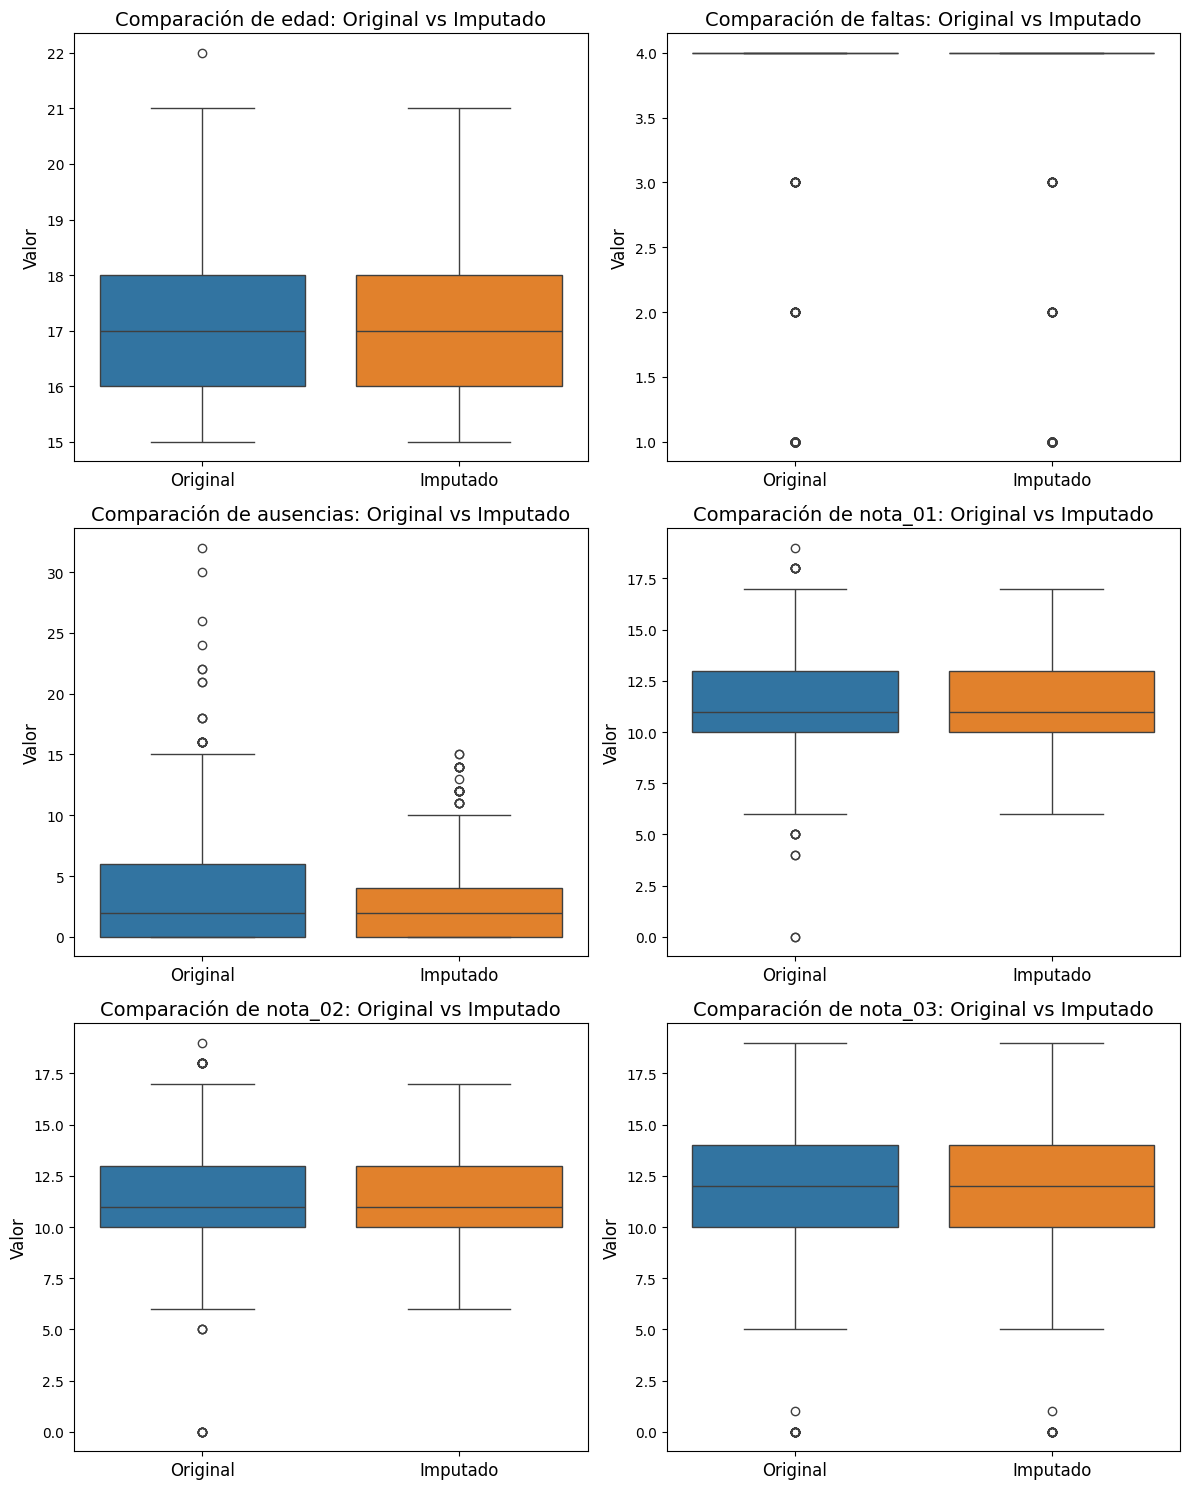

In [ ]:
# Crear un DataFrame que combine los valores originales e imputados
df_comparison = pd.DataFrame()

for col in numeric_cols:
    df_comparison[f'{col}_original'] = df_algebra_vectorial[col]
    df_comparison[f'{col}_imputed'] = dfc[col]

# Definir el número de filas según el número de variables numéricas
num_vars = len(numeric_cols)
rows = num_vars if num_vars <= 4 else (num_vars // 2) + (num_vars % 2)

# Generar los boxplots comparativos con un diseño más espacioso
plt.figure(figsize=(12, 5 * rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, 2, i + 1)
    sns.boxplot(data=df_comparison[[f'{col}_original', f'{col}_imputed']])
    plt.title(f'Comparación de {col}: Original vs Imputado', fontsize=14)
    plt.xticks([0, 1], ['Original', 'Imputado'], fontsize=12)
    plt.xlabel('')
    plt.ylabel('Valor', fontsize=12)

plt.tight_layout()
plt.show()

### **Hipótesis 2**

En esta hipótesis se plantea que es importante evitar la imputación de los atípicos pues se eliminaría información importante, como rangos de notas y rangos de faltas. Por lo tanto, ningun atípico de las variables mencionadas será imputado, solo ausencias y edad.

In [ ]:
dfc_01 = df_algebra_vectorial.copy()

# Imputar atípicos en cada columna numérica
for col in numeric_cols:
    # Eliminar valores faltantes para el cálculo
    col_data = df_algebra_vectorial[col].dropna()

    # Calcular IQR
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if col in ['nota_03','nota_01','nota_02','faltas']:
        continue
    else:
        # Para otras variables, imputar con la mediana de los valores dentro de los límites de IQR
        median_non_outliers = dfc_01[(dfc_01[col] >= lower_bound) & (dfc_01[col] <= upper_bound)][col].median()
        dfc_01.loc[(dfc_01[col] < lower_bound) | (dfc_01[col] > upper_bound), col] = median_non_outliers


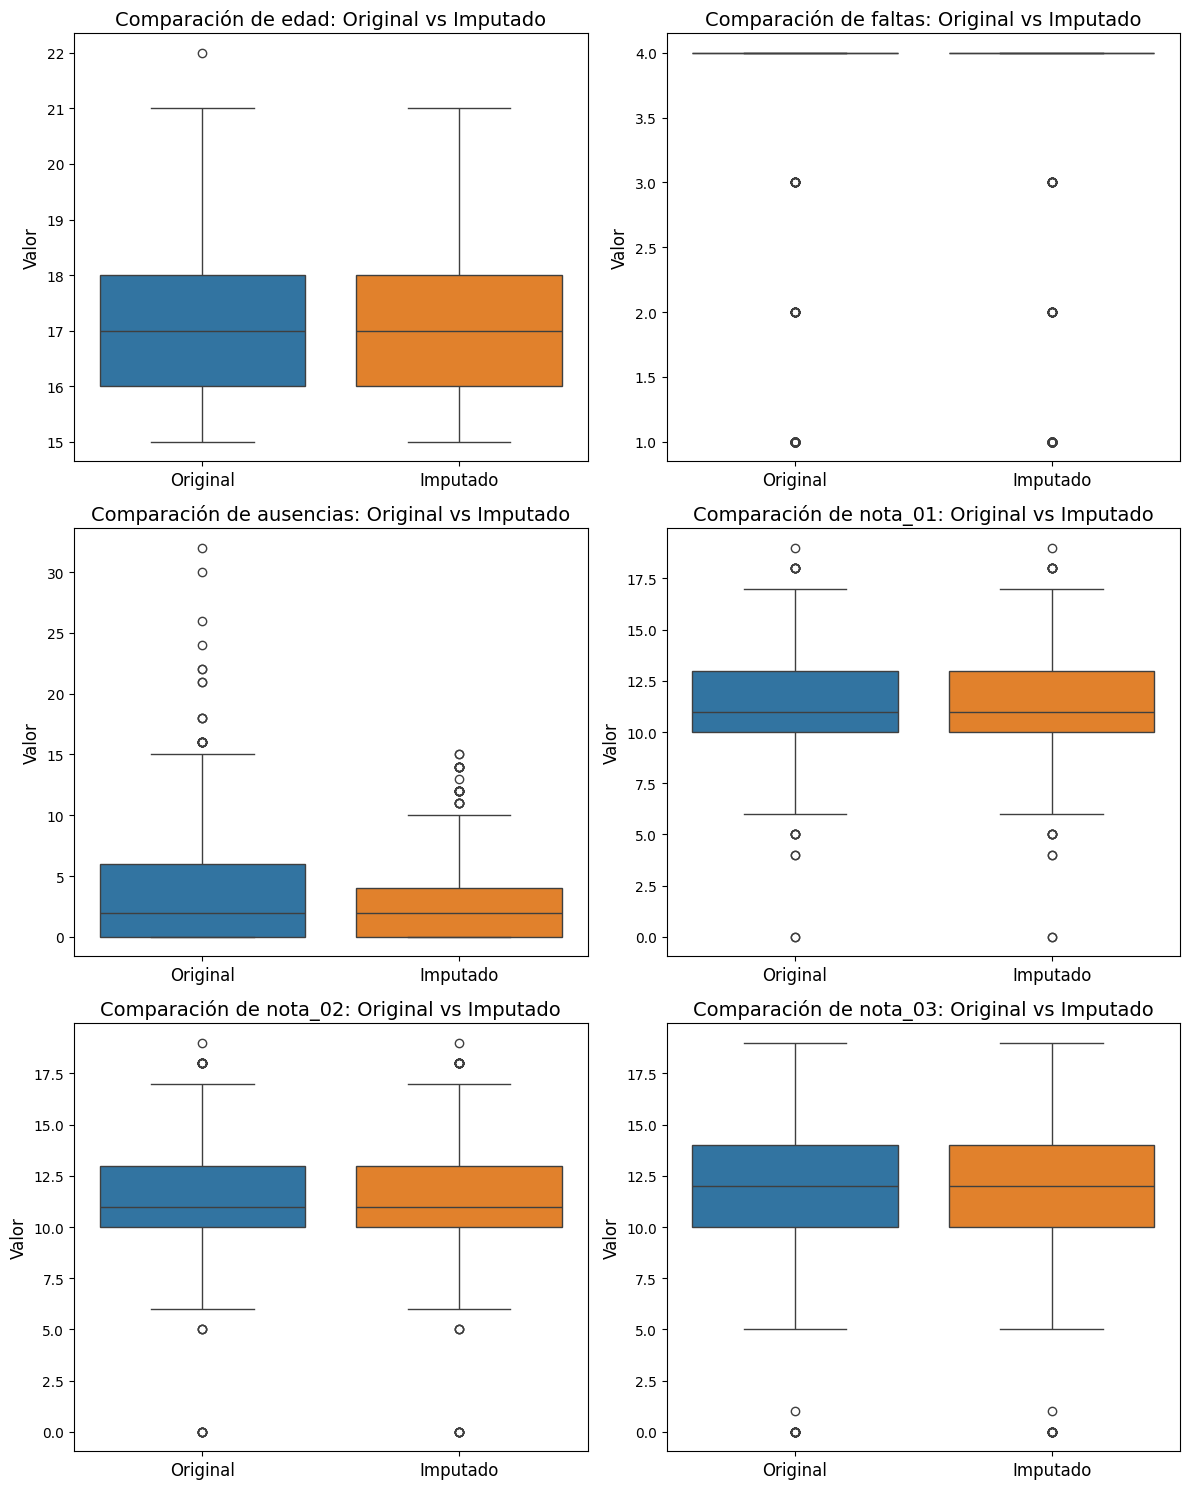

In [ ]:
# Crear un DataFrame que combine los valores originales e imputados
df_comparison = pd.DataFrame()

for col in numeric_cols:
    df_comparison[f'{col}_original'] = df_algebra_vectorial[col]
    df_comparison[f'{col}_imputed'] = dfc_01[col]

# Definir el número de filas según el número de variables numéricas
num_vars = len(numeric_cols)
rows = num_vars if num_vars <= 4 else (num_vars // 2) + (num_vars % 2)

# Generar los boxplots comparativos con un diseño más espacioso
plt.figure(figsize=(12, 5 * rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, 2, i + 1)
    sns.boxplot(data=df_comparison[[f'{col}_original', f'{col}_imputed']])
    plt.title(f'Comparación de {col}: Original vs Imputado', fontsize=14)
    plt.xticks([0, 1], ['Original', 'Imputado'], fontsize=12)
    plt.xlabel('')
    plt.ylabel('Valor', fontsize=12)

plt.tight_layout()
plt.show()

A partir de este momento se trabajarán dos dataframes, con el fin de evaluar el desempeño del modelo de las dos hipótesis planteadas.

El dataframe *'dfc'* no tiene los valores de las variables *'nota_03'* y *'faltas'* imputados.

El dataframe *'dfc_01'* corresponde a la hipótesis 2, donde no se imputan los atípicos de las variables *'nota_01'*, *'nota_02'*, *'nota_03'* y *'faltas'*.

# Elección de variables númericas y categoricas

### Elección de variables para hipótesis 1, con imputaciones en nota_01 y nota_02. Data frame: dfc

#### Variables categóricas

In [ ]:
#Nivel de significancia entre nota_03 en relacion a todas las variables categoricas, por medio de la ANOVA

categorical_cols = dfc.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    model = ols(f'nota_03 ~ C({col})', data=dfc).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"ANOVA para la variable '{col}':")
    print(anova_table)
    print("\n")
    if anova_table['PR(>F)'][f'C({col})'] > 0.025:
        print('Se rechaza')
    else:
        print('Se acepta')
    print("\n" + "="*80 + "\n")

ANOVA para la variable 'departamento':
                      sum_sq     df          F        PR(>F)
C(departamento)   543.163510    1.0  56.665646  1.733784e-13
Residual         6220.931728  649.0        NaN           NaN


Se acepta


ANOVA para la variable 'sexo':
               sum_sq     df          F    PR(>F)
C(sexo)    111.882524    1.0  10.915429  0.001006
Residual  6652.212714  649.0        NaN       NaN


Se acepta


ANOVA para la variable 'direccion':
                   sum_sq     df          F    PR(>F)
C(direccion)   188.468909    1.0  18.601471  0.000019
Residual      6575.626330  649.0        NaN       NaN


Se acepta


ANOVA para la variable 't_familia':
                   sum_sq     df         F    PR(>F)
C(t_familia)    13.840643    1.0  1.330702  0.249105
Residual      6750.254596  649.0       NaN       NaN


Se rechaza


ANOVA para la variable 'padres_status':
                       sum_sq     df        F    PR(>F)
C(padres_status)     0.001151    1.0  0.00011  0.99

Si se utiliza un nivel de significancia de 0.025 para así ser mucho más estrictos con el modelo, se puede concluir que, de todas las variables analizadas, las que parecen tener un efecto significativo o mayor relación con "nota_03" son:

departamento, sexo, direccion, madre_edu, padre_edu, madre_trab, padre_trab, razon, t_examen, t_estudio, postgrado, internet, relacion_sen, relacion_fam, tiempo_libre, salir_amigos, cons_alcohol_sem, cons_alcohol_finde.
Ademas, dado la experiencia, si un padre tiene educacion el otro tiene mas probabilidad de tambien tenerla, es por esto que estas dos variables van de la mano.

Las demás variables no muestran una influencia significativa en "nota_03", según los resultados del ANOVA.

#### Diagrama de correlacion de las variables numéricas



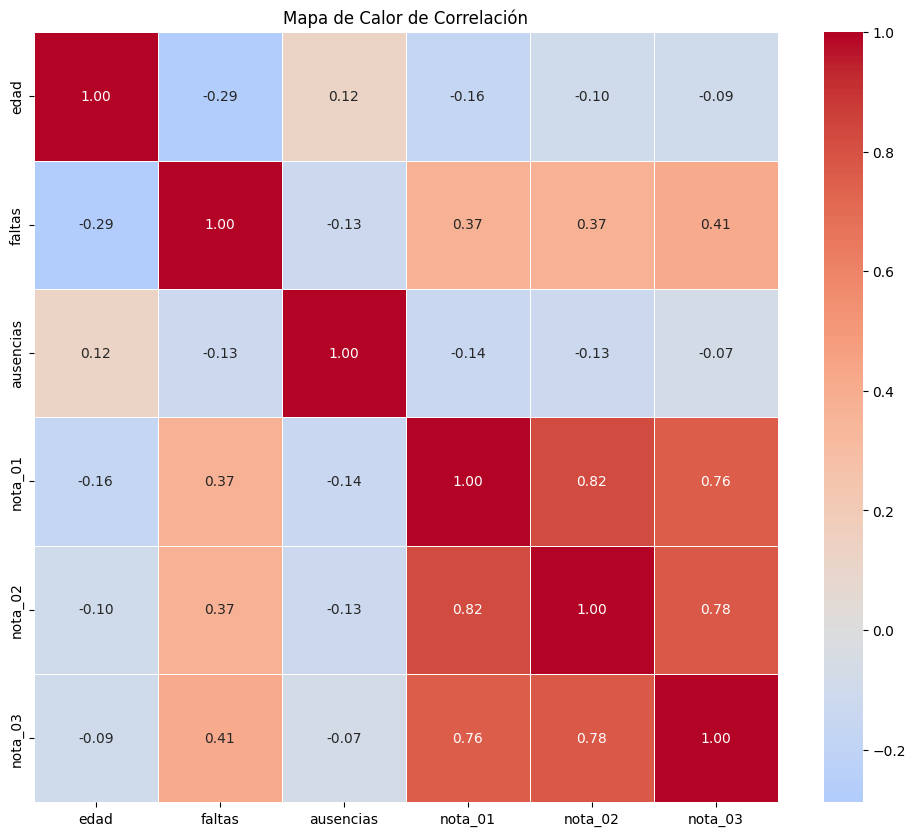

In [ ]:
def graficar_mapa_correlacion(df):
    # Seleccionar las columnas numéricas
    numeric_vars = df.select_dtypes(include=['number']).columns

    # Calcular la matriz de correlación
    corr_matrix = df[numeric_vars].corr(method='pearson')  # Puedes cambiar 'pearson' por 'spearman'

    # Crear el mapa de calor
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
    plt.title('Mapa de Calor de Correlación')
    plt.show()

# Llamar a la función para generar el mapa de calor de correlación
graficar_mapa_correlacion(dfc)

La variable faltas presenta una correlación alta con cada una de las notas, sin embargo, muestra ser directa y, como programadores concluimos que, no tiene mucho sentido que a mayor faltas, mejor nota.

Las variables 'nota_01' y 'nota_02' presentan una relación muy alta entre ellas, lo que podría presentar un problema de multicolineidad.

La relación de la VR con ausencias es inversa, así como edad. Sim embargo, no tienen una correlación significativa con 'nota_03'

'nota_01' y 'nota_02' son las variables que mayor correlación tienen con la variable respuesta, lo que da un indicio de las variables que debemos escoger para el modelo.

### Elección de variables para hipótesis 2, sin imputación de outliers para nota_01 y nota_02. Data frame: dfc_01

#### Variables categóricas

In [ ]:
#Nivel de significancia entre nota_03 en relacion a todas las variables categoricas, por medio de la ANOVA

categorical_cols_01 = dfc_01.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols_01:
    model = ols(f'nota_03 ~ C({col})', data=dfc_01).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"ANOVA para la variable '{col}':")
    print(anova_table)
    print("\n")
    if anova_table['PR(>F)'][f'C({col})'] > 0.025:
        print('Se rechaza')
    else:
        print('Se acepta')
    print("\n" + "="*80 + "\n")

ANOVA para la variable 'departamento':
                      sum_sq     df          F        PR(>F)
C(departamento)   543.163510    1.0  56.665646  1.733784e-13
Residual         6220.931728  649.0        NaN           NaN


Se acepta


ANOVA para la variable 'sexo':
               sum_sq     df          F    PR(>F)
C(sexo)    111.882524    1.0  10.915429  0.001006
Residual  6652.212714  649.0        NaN       NaN


Se acepta


ANOVA para la variable 'direccion':
                   sum_sq     df          F    PR(>F)
C(direccion)   188.468909    1.0  18.601471  0.000019
Residual      6575.626330  649.0        NaN       NaN


Se acepta


ANOVA para la variable 't_familia':
                   sum_sq     df         F    PR(>F)
C(t_familia)    13.840643    1.0  1.330702  0.249105
Residual      6750.254596  649.0       NaN       NaN


Se rechaza


ANOVA para la variable 'padres_status':
                       sum_sq     df        F    PR(>F)
C(padres_status)     0.001151    1.0  0.00011  0.99

Si se utiliza un nivel de significancia de 0.025 para la hipótesis 2, se puede concluir que, las variables con mayor relación con "nota_03" son:

departamento, sexo, direccion, madre_edu, padre_edu, madre_trab, padre_trab, razon, t_examen, t_estudio, postgrado, internet, relacion_sen, relacion_fam, tiempo_libre, salir_amigos, cons_alcohol_sem, cons_alcohol_finde.

Son las mismas variables seleccionadas para la hipótesis 1.

Las demás variables no muestran una influencia significativa en "nota_03", según los resultados del ANOVA.

#### Variable numéricas

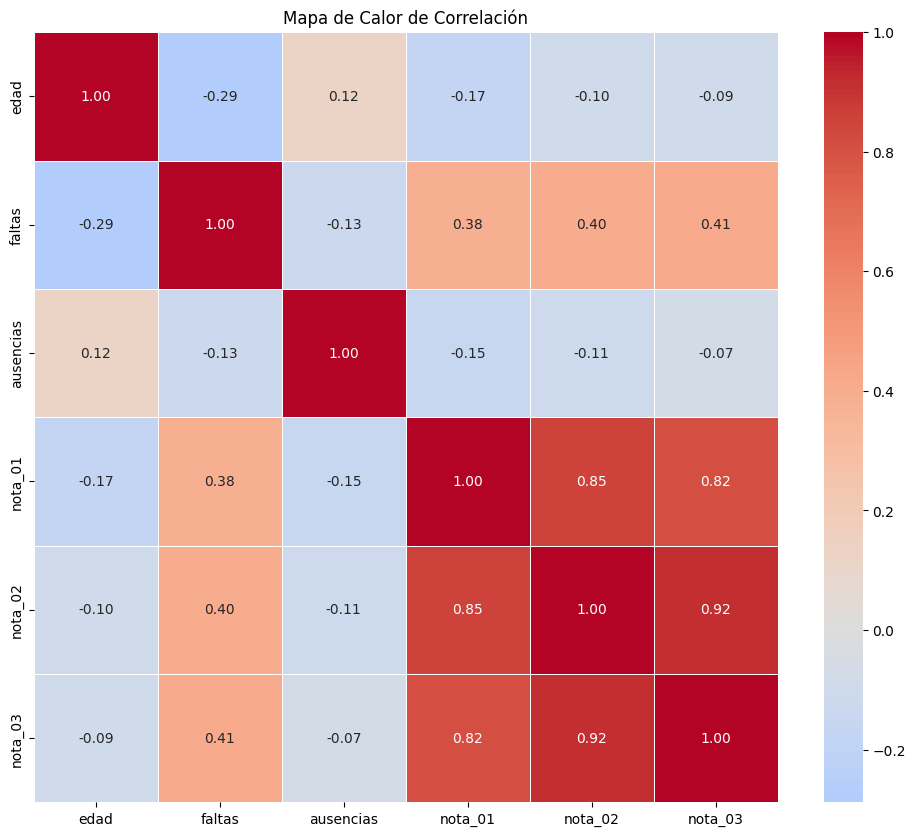

In [ ]:
# Llamar a la función para generar el mapa de calor de correlación
graficar_mapa_correlacion(dfc_01)

Se encuentran correlaciones muy parecidas a las de la hipótesis 1, aumentando la relación entre las notas.

## Pruebas de normalidad de variable respuesta y variables mas correlacionadas


#### Para dfc

In [ ]:
#prueba de normalidad Kolmogorov-Smirnov
def ks_test_normal(df,variables):
    for var in variables:
        statistic, p_value = kstest(df[var], 'norm', args=(df[var].mean(), df[var].std()))
        print(f"Variable: {var}")
        print(f"KS Statistic: {statistic:.4f}, p-value: {p_value:.4f}")
        if p_value > 0.05:
            print(f"p-value > 0.05: No se rechaza la hipótesis nula, {var} podría seguir una distribución normal.\n")
        else:
            print(f"p-value <= 0.05: Se rechaza la hipótesis nula, {var} no sigue una distribución normal.\n")

# Aplicar la función al DataFrame
variables = ['nota_01', 'nota_02', 'nota_03']
ks_results = ks_test_normal(dfc,variables)

Variable: nota_01
KS Statistic: 0.1036, p-value: 0.0000
p-value <= 0.05: Se rechaza la hipótesis nula, nota_01 no sigue una distribución normal.

Variable: nota_02
KS Statistic: 0.1234, p-value: 0.0000
p-value <= 0.05: Se rechaza la hipótesis nula, nota_02 no sigue una distribución normal.

Variable: nota_03
KS Statistic: 0.1238, p-value: 0.0000
p-value <= 0.05: Se rechaza la hipótesis nula, nota_03 no sigue una distribución normal.



In [ ]:
def prueba_normalidad(df, variables):

    for var in variables:
        stat, p_value = stats.shapiro(df[var].dropna())
        print(f'Prueba de Normalidad de Shapiro-Wilk para {var}:')
        print(f'Estadístico: {stat}, Valor-p: {p_value}')
        if p_value > 0.05:
            print('No se rechaza la hipótesis nula: los datos parecen seguir una distribución normal.')
        else:
            print('Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.')
        print("\n")

# Realizar la prueba de normalidad
variables = ['nota_01', 'nota_02', 'nota_03']
prueba_normalidad(dfc, variables)

Prueba de Normalidad de Shapiro-Wilk para nota_01:
Estadístico: 0.977607627058462, Valor-p: 2.000077916375767e-08
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para nota_02:
Estadístico: 0.9750758204033254, Valor-p: 4.4263743212854644e-09
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para nota_03:
Estadístico: 0.925819288548229, Valor-p: 2.1590746214358812e-17
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.




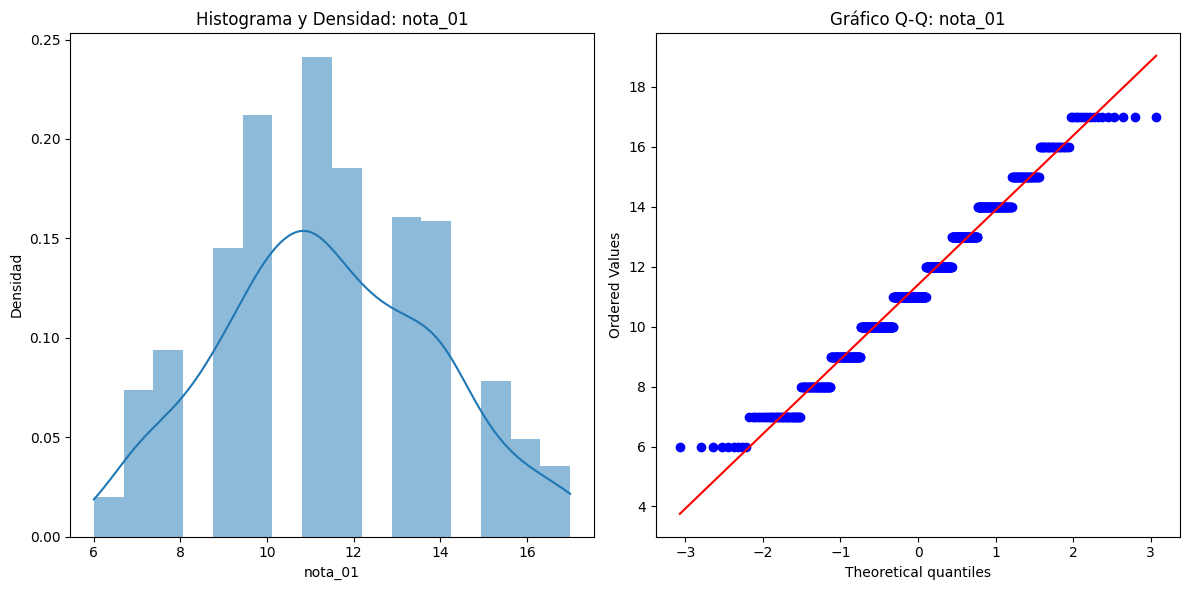

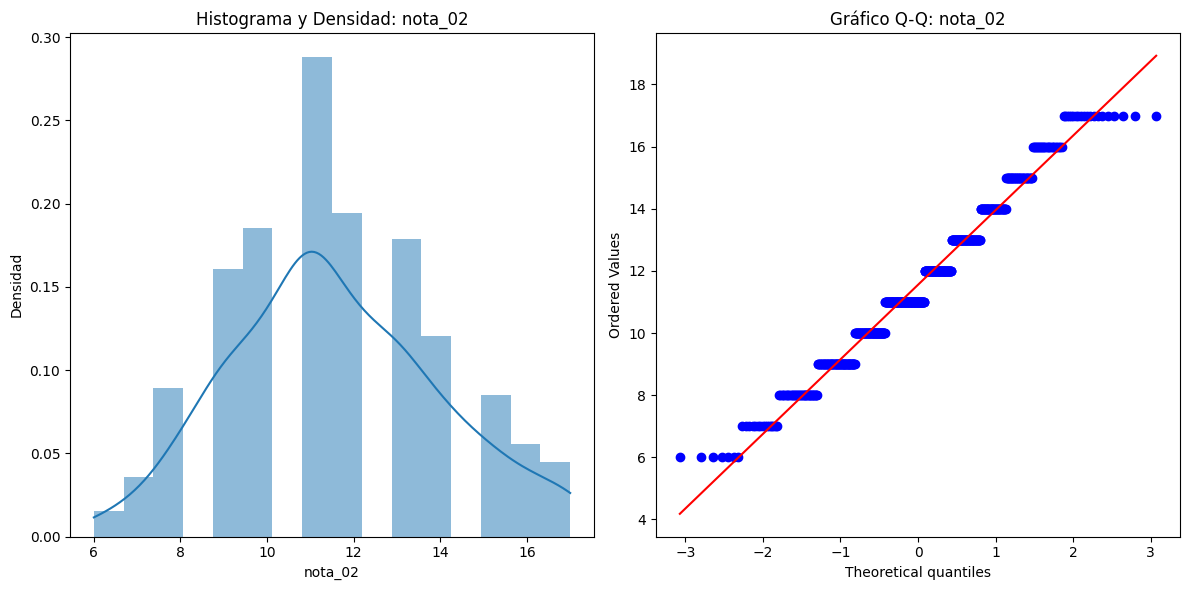

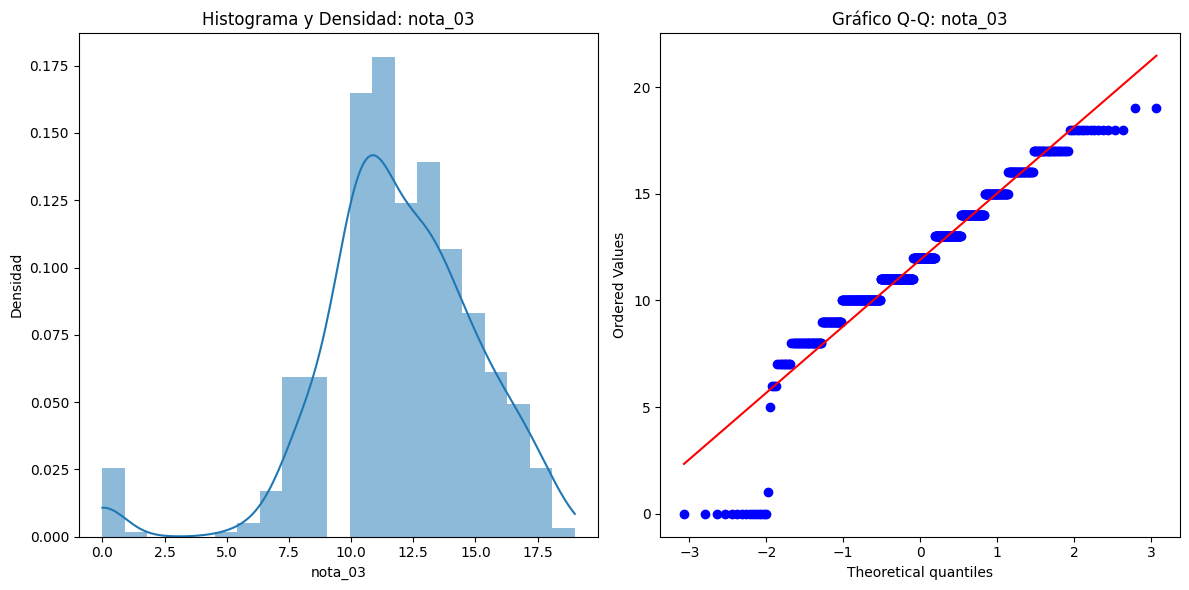

In [ ]:
def evaluar_normalidad(df, variables):
    """
    Evalúa la normalidad de las variables numéricas en el DataFrame usando histogramas con líneas de densidad y gráficos Q-Q.

    Args:
    df (pd.DataFrame): DataFrame que contiene las variables numéricas.
    variables (list): Lista de nombres de las variables a evaluar.
    """
    for var in variables:
        plt.figure(figsize=(12, 6))

        # Histograma con línea de densidad
        plt.subplot(1, 2, 1)
        sns.histplot(df[var], kde=True, stat='density', linewidth=0)
        plt.title(f'Histograma y Densidad: {var}')
        plt.xlabel(var)
        plt.ylabel('Densidad')

        # Gráfico Q-Q
        plt.subplot(1, 2, 2)
        stats.probplot(df[var].dropna(), dist="norm", plot=plt)
        plt.title(f'Gráfico Q-Q: {var}')

        plt.tight_layout()
        plt.show()


evaluar_normalidad(dfc, variables)

In [ ]:
dfc_transformado = dfc.copy()

from sklearn.preprocessing import StandardScaler
dfc_transformado['nota_01'] = np.log1p(dfc_transformado['nota_01'])  # Transformación logarítmica
dfc_transformado['nota_02'] = np.log1p(dfc_transformado['nota_02'])  # Transformación logarítmica
dfc_transformado['nota_03'] = np.log1p(dfc_transformado['nota_03'])  # Transformación logarítmica
dfc_transformado[['nota_01', 'nota_02', 'nota_03']] = StandardScaler().fit_transform(dfc_transformado[['nota_01', 'nota_02', 'nota_03']])  # Estandarización

In [ ]:
#variables = ['nota_01', 'nota_02', 'nota_03']
def prueba_normalidad(df, variables):

    for var in variables:
        stat, p_value = stats.shapiro(df[var].dropna())
        print(f'Prueba de Normalidad de Shapiro-Wilk para {var}:')
        print(f'Estadístico: {stat}, Valor-p: {p_value}')
        if p_value > 0.05:
            print('No se rechaza la hipótesis nula: los datos parecen seguir una distribución normal.')
        else:
            print('Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.')
        print("\n")

# Realizar la prueba de normalidad
prueba_normalidad(dfc_transformado, variables)

Prueba de Normalidad de Shapiro-Wilk para nota_01:
Estadístico: 0.9708475657893445, Valor-p: 4.3263953075046317e-10
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para nota_02:
Estadístico: 0.974913639205763, Valor-p: 4.031504795893135e-09
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para nota_03:
Estadístico: 0.5610036075475466, Valor-p: 2.0642745976187553e-37
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.




A pesar de aplicar una transformación logarítmica a las variables más significativas, estas no cumplen con el supuesto de normalidad. Por lo tanto, retomaremos el análisis utilizando la base de datos original, "dfc", en la cual no se ha aplicado esta transformación logarítmica

#### Para dfc_01

In [ ]:
#prueba de normalidad Kolmogorov-Smirnov
# Aplicar la función al DataFrame
variables = ['nota_01', 'nota_02', 'nota_03']
ks_results = ks_test_normal(dfc_01,variables)

Variable: nota_01
KS Statistic: 0.0832, p-value: 0.0002
p-value <= 0.05: Se rechaza la hipótesis nula, nota_01 no sigue una distribución normal.

Variable: nota_02
KS Statistic: 0.0876, p-value: 0.0001
p-value <= 0.05: Se rechaza la hipótesis nula, nota_02 no sigue una distribución normal.

Variable: nota_03
KS Statistic: 0.1238, p-value: 0.0000
p-value <= 0.05: Se rechaza la hipótesis nula, nota_03 no sigue una distribución normal.



In [ ]:
# Realizar la prueba de normalidad
variables = ['nota_01', 'nota_02', 'nota_03']
prueba_normalidad(dfc_01, variables)

Prueba de Normalidad de Shapiro-Wilk para nota_01:
Estadístico: 0.9836021142714357, Valor-p: 1.105612702974115e-06
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para nota_02:
Estadístico: 0.9615340034885028, Valor-p: 4.992505317936048e-12
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para nota_03:
Estadístico: 0.925819288548229, Valor-p: 2.1590746214358812e-17
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.




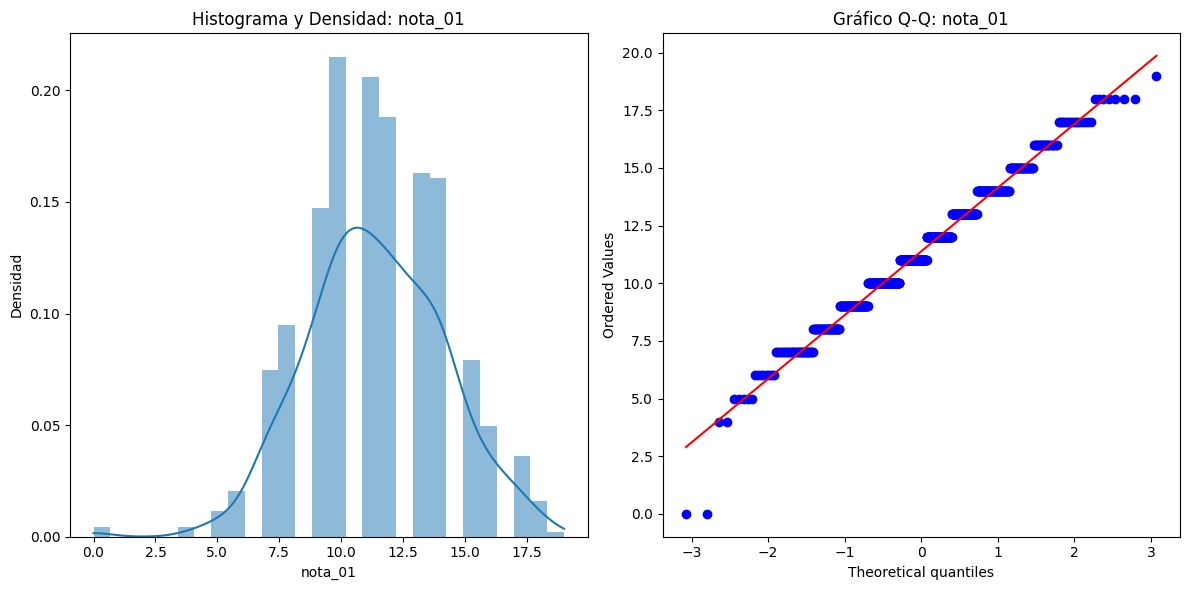

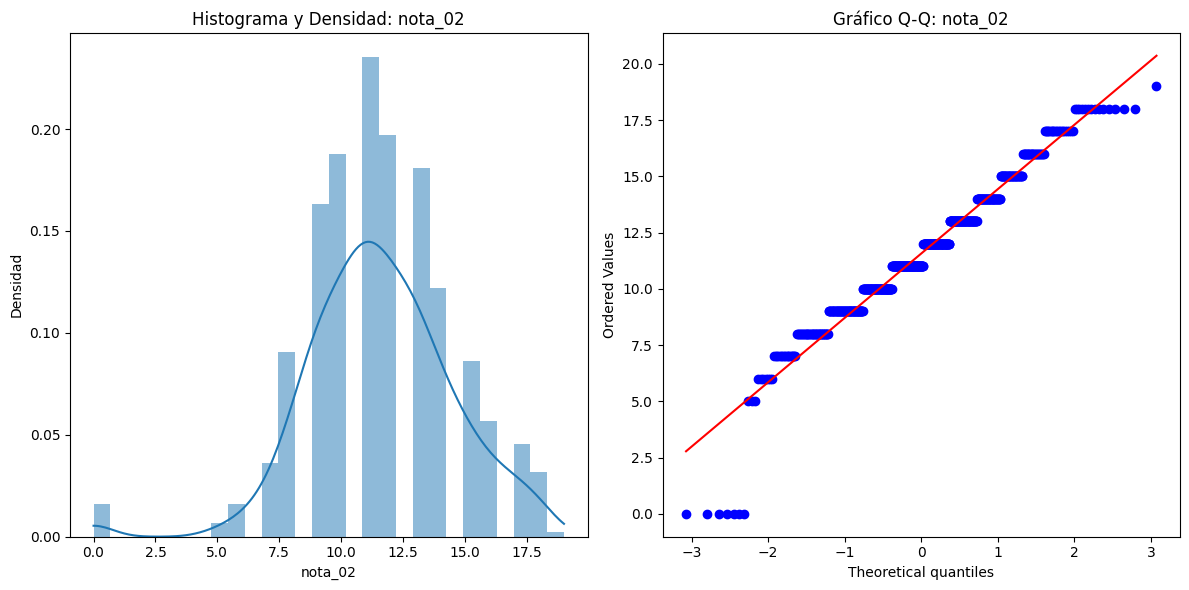

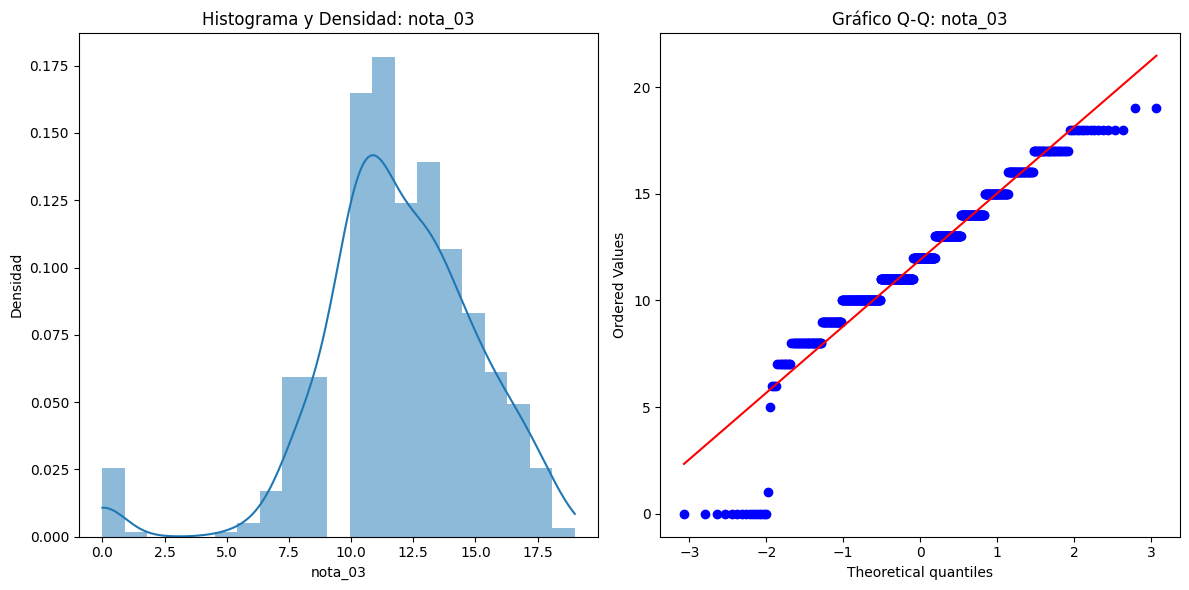

In [ ]:
#Evalúa la normalidad de las variables numéricas en el DataFrame usando histogramas con líneas de densidad y gráficos Q-Q.

evaluar_normalidad(dfc_01, variables)

In [ ]:
dfc_01_transformado = dfc_01.copy()

from sklearn.preprocessing import StandardScaler
dfc_01_transformado['nota_01'] = np.log1p(dfc_01_transformado['nota_01'])  # Transformación logarítmica
dfc_01_transformado['nota_02'] = np.log1p(dfc_01_transformado['nota_02'])  # Transformación logarítmica
dfc_01_transformado['nota_03'] = np.log1p(dfc_01_transformado['nota_03'])  # Transformación logarítmica
dfc_01_transformado[['nota_01', 'nota_02', 'nota_03']] = StandardScaler().fit_transform(dfc_01_transformado[['nota_01', 'nota_02', 'nota_03']])  # Estandarización

In [ ]:
# Realizar la prueba de normalidad después de transformación
prueba_normalidad(dfc_01_transformado, variables)

Prueba de Normalidad de Shapiro-Wilk para nota_01:
Estadístico: 0.8410083994110361, Valor-p: 5.447505519431351e-25
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para nota_02:
Estadístico: 0.6617440274681725, Valor-p: 5.675734509274447e-34
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para nota_03:
Estadístico: 0.5610036075475466, Valor-p: 2.0642745976187553e-37
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.




# Preparación de los datos

Después de analizar el comportamiento y la correlación de las variables, se seleccionaron aquellas que tienen mayor impacto en nuestra variable respuesta. Estas son:

**NUMERICAS**: Se escogieron estas variables puesto que eran las que evidenciaban mayor correlacion entre ellas y respecto a la variable respuesta
*   nota_1
*   nota_2
*   nota_3

La variable **faltas** presenta un comportamiento opuesto a la hipotesis esperada, la cual sería que a mayor faltas, menor sea la nota del estudiante.  Por el contrario estas variables tienen una correlación positiva, lo que quiere decir que a mayor faltas mayor es la nota del estudiante. Bajo este criterio decidimos no tomar la variable faltas para nuestro modelo

**CATEGORICAS**: La seleccion de estas, fue basada en los resultados de las ANOVAS, que permiten observar el nivel de significancia de las variables categoricas en relacion a la variable numérica "nota_03", ademas tambien se tuvo en cuenta para la selección de estas variables la experiencia y previo conocimiento del tema
*   departamento
*   sexo
*   direccion
*   madre_edu
*   padre_edu
*   madre_trab
*   padre_trab
*   razon
*   t_examen
*   t_estudio
*   postgrado
*   internet
*   relacion_sen
*   relacion_fam
*   salir_amigos
*   tiempo_libre
*   cons_alcohol_sem
*   cons_alcohol_finde

### Para dfc

Teniendo en cuenta la matriz de correlación presentada anteriormente, es notable que la correlación entre nota_01 y nota_02 es alta de 82%, lo que podría presentar un problema de multicolinealidad. Por lo tanto, para la hipótesis 1, solo se tendrá en cuenta la nota que tiene mayor relación con la variable respuesta, que en este caso es nota_02.

In [ ]:
#Creacion de vectores con variables numericas y categoricas
numericas = ['nota_02', 'nota_03']
df_numericas = dfc[numericas]

categoricas = ['departamento', 'sexo', 'direccion', 'madre_edu','padre_edu', 'madre_trab', 'padre_trab', 'razon', 't_examen', 't_estudio', 'postgrado', 'internet', 'relacion_sen', 'salir_amigos', 'tiempo_libre', 'cons_alcohol_sem','cons_alcohol_finde']
df_categoricas = dfc[categoricas]

#Union de vectores para formar el dataframe con el que se hara el modelo
df_final_algebra = pd.concat([df_numericas, df_categoricas], axis=1)
df_final_algebra

,nota_02,nota_03,departamento,sexo,direccion,madre_edu,padre_edu,madre_trab,padre_trab,razon,t_examen,t_estudio,postgrado,internet,relacion_sen,salir_amigos,tiempo_libre,cons_alcohol_sem,cons_alcohol_finde
0,11,11,II,M,U,Educación superior,Educación superior,en_casa,profesor,habilidad,15 a 30 min,2 a 5 horas,si,no,no,Alto,Medio,Muy bajo,Muy bajo
1,11,11,II,M,U,Primaria hasta 5°,Primaria hasta 5°,en_casa,otro,habilidad,< 15 min,2 a 5 horas,si,si,no,Medio,Medio,Muy bajo,Muy bajo
2,13,12,II,M,U,Primaria hasta 5°,Primaria hasta 5°,en_casa,otro,otro,< 15 min,2 a 5 horas,si,si,no,Bajo,Medio,Bajo,Medio
3,14,14,II,M,U,Educación superior,6° a 9°,salud,servicios,recomendacion,< 15 min,5 a 10 horas,si,si,si,Bajo,Bajo,Muy bajo,Muy bajo
4,13,13,II,M,U,10° a 11°,10° a 11°,otro,otro,recomendacion,< 15 min,2 a 5 horas,si,no,no,Bajo,Medio,Muy bajo,Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,12,9,IS,M,U,Primaria hasta 5°,Primaria hasta 5°,otro,otro,habilidad,15 a 30 min,2 a 5 horas,si,no,no,Muy bajo,Muy bajo,Muy bajo,Muy bajo
647,10,10,IS,H,U,10° a 11°,Primaria hasta 5°,servicios,servicios,habilidad,15 a 30 min,< 2 horas,si,si,no,Muy alto,Alto,Medio,Alto
648,11,11,IS,H,R,10° a 11°,6° a 9°,servicios,otro,habilidad,30 min a 1 hora,< 2 horas,si,si,no,Muy bajo,Alto,Medio,Alto
649,11,11,II,M,U,Educación superior,Educación superior,en_casa,profesor,habilidad,15 a 30 min,2 a 5 horas,si,no,no,Alto,Medio,Muy bajo,Muy bajo


### Para dfc_01

Para la hipótesis 2, se decide no tener en cuenta la correlación de nota_01 y nota_02. Lo anterior con el fin de realizar un modelo donde se evalue el desempeño del mismo teniendo en cuenta ambas notas, pues como científicos consideramos que entre más datos históricos de información de las notas, mejor la predicción.

In [ ]:
#Creacion de vectores con variables numericas y categoricas
numericas_01 = ['nota_01', 'nota_02', 'nota_03']
df_01_numericas = dfc_01[numericas]

categoricas_01 = ['departamento', 'sexo', 'direccion', 'madre_edu','padre_edu', 'madre_trab', 'padre_trab', 'razon', 't_examen', 't_estudio', 'postgrado', 'internet', 'relacion_sen', 'salir_amigos', 'tiempo_libre', 'cons_alcohol_sem','cons_alcohol_finde']
df_01_categoricas = dfc_01[categoricas]

#Union de vectores para formar el dataframe con el que se hara el modelo
df_final_algebra_01 = pd.concat([df_01_numericas, df_01_categoricas], axis=1)
df_final_algebra_01

,nota_02,nota_03,departamento,sexo,direccion,madre_edu,padre_edu,madre_trab,padre_trab,razon,t_examen,t_estudio,postgrado,internet,relacion_sen,salir_amigos,tiempo_libre,cons_alcohol_sem,cons_alcohol_finde
0,11,11,II,M,U,Educación superior,Educación superior,en_casa,profesor,habilidad,15 a 30 min,2 a 5 horas,si,no,no,Alto,Medio,Muy bajo,Muy bajo
1,11,11,II,M,U,Primaria hasta 5°,Primaria hasta 5°,en_casa,otro,habilidad,< 15 min,2 a 5 horas,si,si,no,Medio,Medio,Muy bajo,Muy bajo
2,13,12,II,M,U,Primaria hasta 5°,Primaria hasta 5°,en_casa,otro,otro,< 15 min,2 a 5 horas,si,si,no,Bajo,Medio,Bajo,Medio
3,14,14,II,M,U,Educación superior,6° a 9°,salud,servicios,recomendacion,< 15 min,5 a 10 horas,si,si,si,Bajo,Bajo,Muy bajo,Muy bajo
4,13,13,II,M,U,10° a 11°,10° a 11°,otro,otro,recomendacion,< 15 min,2 a 5 horas,si,no,no,Bajo,Medio,Muy bajo,Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,12,9,IS,M,U,Primaria hasta 5°,Primaria hasta 5°,otro,otro,habilidad,15 a 30 min,2 a 5 horas,si,no,no,Muy bajo,Muy bajo,Muy bajo,Muy bajo
647,10,10,IS,H,U,10° a 11°,Primaria hasta 5°,servicios,servicios,habilidad,15 a 30 min,< 2 horas,si,si,no,Muy alto,Alto,Medio,Alto
648,11,11,IS,H,R,10° a 11°,6° a 9°,servicios,otro,habilidad,30 min a 1 hora,< 2 horas,si,si,no,Muy bajo,Alto,Medio,Alto
649,11,11,II,M,U,Educación superior,Educación superior,en_casa,profesor,habilidad,15 a 30 min,2 a 5 horas,si,no,no,Alto,Medio,Muy bajo,Muy bajo


# Creación modelo de regresión lineal

### Para dfc

*     Separar variable respuesta de variables para predecir

In [ ]:
y_target=df_final_algebra['nota_03'] #Variable respuesta del modelo
x_features=df_final_algebra.drop(['nota_03'],axis=1) #variables de interés para el modelo

In [ ]:
x_features.head()
#x_features['edad']=x_features['edad'].astype(object) PREGUNTAR
#x_features.dtypes

,nota_02,departamento,sexo,direccion,madre_edu,padre_edu,madre_trab,padre_trab,razon,t_examen,t_estudio,postgrado,internet,relacion_sen,salir_amigos,tiempo_libre,cons_alcohol_sem,cons_alcohol_finde
0,11,II,M,U,Educación superior,Educación superior,en_casa,profesor,habilidad,15 a 30 min,2 a 5 horas,si,no,no,Alto,Medio,Muy bajo,Muy bajo
1,11,II,M,U,Primaria hasta 5°,Primaria hasta 5°,en_casa,otro,habilidad,< 15 min,2 a 5 horas,si,si,no,Medio,Medio,Muy bajo,Muy bajo
2,13,II,M,U,Primaria hasta 5°,Primaria hasta 5°,en_casa,otro,otro,< 15 min,2 a 5 horas,si,si,no,Bajo,Medio,Bajo,Medio
3,14,II,M,U,Educación superior,6° a 9°,salud,servicios,recomendacion,< 15 min,5 a 10 horas,si,si,si,Bajo,Bajo,Muy bajo,Muy bajo
4,13,II,M,U,10° a 11°,10° a 11°,otro,otro,recomendacion,< 15 min,2 a 5 horas,si,no,no,Bajo,Medio,Muy bajo,Bajo


*   Dumizacion de variables categoricas y escalamiento de variables numericas

In [ ]:
def preprocess_features(df):
    # Procesar variables categóricas
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        valores = df[col].unique()
        if len(valores) == 2:
            df[col] = df[col].map({valores[0]: 0, valores[1]: 1})
        else:
            # Si hay más de dos categorías, crear dummies
            dummies = pd.get_dummies(df[col], prefix=col, drop_first= False)
            df = pd.concat([df.drop(col, axis=1), dummies], axis=1)

    # Procesar columnas booleanas
    boolean_cols = df.select_dtypes(include='bool').columns
    df[boolean_cols] = df[boolean_cols].astype(int)

    # Identificar columnas numéricas
    numcol = [col for col in df.columns if df[col].dtype == "int64"]

    # Aplicar Min-Max Scaling
    scaler = MinMaxScaler()
    df[numcol] = scaler.fit_transform(df[numcol])

    return df

x_features_dum=x_features.copy()
x_features_dum=preprocess_features(x_features_dum)
x_features_dum.head()

,nota_02,departamento,sexo,direccion,postgrado,internet,relacion_sen,madre_edu_10° a 11°,madre_edu_6° a 9°,madre_edu_Educación superior,madre_edu_Ninguno,madre_edu_Primaria hasta 5°,padre_edu_10° a 11°,padre_edu_6° a 9°,padre_edu_Educación superior,padre_edu_Ninguno,padre_edu_Primaria hasta 5°,madre_trab_en_casa,madre_trab_otro,madre_trab_profesor,madre_trab_salud,madre_trab_servicios,padre_trab_en_casa,padre_trab_otro,padre_trab_profesor,padre_trab_salud,padre_trab_servicios,razon_habilidad,razon_otro,razon_recomendacion,razon_reputacion,t_examen_15 a 30 min,t_examen_30 min a 1 hora,t_examen_< 15 min,t_examen_> 1 hora,t_estudio_2 a 5 horas,t_estudio_5 a 10 horas,t_estudio_< 2 horas,t_estudio_> 10 horas,salir_amigos_Alto,salir_amigos_Bajo,salir_amigos_Medio,salir_amigos_Muy alto,salir_amigos_Muy bajo,tiempo_libre_Alto,tiempo_libre_Bajo,tiempo_libre_Medio,tiempo_libre_Muy alto,tiempo_libre_Muy bajo,cons_alcohol_sem_Alto,cons_alcohol_sem_Bajo,cons_alcohol_sem_Medio,cons_alcohol_sem_Muy alto,cons_alcohol_sem_Muy bajo,cons_alcohol_finde_Alto,cons_alcohol_finde_Bajo,cons_alcohol_finde_Medio,cons_alcohol_finde_Muy alto,cons_alcohol_finde_Muy bajo
0,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.454545,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.636364,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.727273,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.636364,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


*    Separacion de base de datos: entrenamiento y prueba

In [ ]:
df_modelo=x_features_dum.copy()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_modelo, y_target, test_size=0.3, random_state=321)

*    Modelo de regresión lineal

In [ ]:
model_reg=LinearRegression()
model_reg.fit(x_train,y_train) #entrenar modelo

LinearRegression()

*   Resultados del modelo

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
print("Coeficientes: ", model_reg.coef_)
print("\nIntercepto: ", model_reg.intercept_)

Coeficientes:  [ 1.06514200e+01 -5.92193834e-01 -2.77029956e-01 -4.76681577e-01
 -4.19092022e-01  3.32555668e-01 -2.40978657e-01 -1.44843308e+13
 -1.44843308e+13 -1.44843308e+13 -1.44843308e+13 -1.44843308e+13
 -1.96457877e+13 -1.96457877e+13 -1.96457877e+13 -1.96457877e+13
 -1.96457877e+13 -8.81740231e+12 -8.81740231e+12 -8.81740231e+12
 -8.81740231e+12 -8.81740231e+12  1.00048667e+13  1.00048667e+13
  1.00048667e+13  1.00048667e+13  1.00048667e+13 -3.59868888e+13
 -3.59868888e+13 -3.59868888e+13 -3.59868888e+13 -1.64909066e+13
 -1.64909066e+13 -1.64909066e+13 -1.64909066e+13  8.14731693e+11
  8.14731693e+11  8.14731693e+11  8.14731693e+11 -1.28001346e+13
 -1.28001346e+13 -1.28001346e+13 -1.28001346e+13 -1.28001346e+13
  1.56314731e+13  1.56314731e+13  1.56314731e+13  1.56314731e+13
  1.56314731e+13 -3.28299190e+12 -3.28299190e+12 -3.28299190e+12
 -3.28299190e+12 -3.28299190e+12 -2.74908441e+12 -2.74908441e+12
 -2.74908441e+12 -2.74908441e+12 -2.74908441e+12]

Intercepto:  87806455716

*   Realizar la predicción

In [ ]:
model_pred_test=model_reg.predict(x_test)
model_pred_test

array([16.890625,  8.375   , 11.3125  , 10.59375 , 11.75    , 12.921875,
       16.96875 , 12.15625 ,  6.5625  , 11.21875 , 14.296875, 13.015625,
       13.65625 , 12.671875, 13.109375, 12.1875  , 14.984375, 11.390625,
        8.5625  , 12.8125  ,  6.328125, 10.8125  , 13.171875, 12.9375  ,
       10.25    ,  9.0625  , 13.40625 , 15.0625  , 11.96875 , 12.9375  ,
       12.859375, 10.8125  , 15.125   , 14.828125,  9.828125, 15.4375  ,
       16.171875,  9.765625, 12.90625 , 13.359375, 12.890625,  8.609375,
       16.1875  ,  6.609375, 11.265625, 13.28125 , 14.703125, 16.453125,
        9.296875, 14.515625, 13.53125 , 13.546875, 11.96875 , 15.328125,
       13.703125,  8.578125, 12.65625 , 11.296875, 16.46875 , 10.671875,
       13.265625, 11.4375  , 11.8125  , 10.921875, 12.921875, 15.8125  ,
       11.328125,  8.28125 , 13.09375 , 14.453125, 12.375   , 13.96875 ,
       10.59375 , 13.4375  , 11.859375,  8.21875 , 10.375   , 12.65625 ,
       11.46875 , 14.015625, 12.734375, 10.078125, 

*   Metricas para el testeo

In [ ]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, model_pred_test))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, model_pred_test)))
print("MAE: %.2f" % mean_absolute_error(y_test, model_pred_test))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, model_pred_test))
print("R2: %.2f" % r2_score(y_test, model_pred_test))

# R2 ajustado
r2 = r2_score(y_test, model_pred_test)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 4.76
RMSE 2.18
MAE: 1.30
MAPE: 1162879399956396.50
R2: 0.56
R2-adjusted: 0.37


*    Metricas para entrenamiento

In [ ]:
model_pred_train=model_reg.predict(x_train)
#model_pred_train

In [ ]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_train, model_pred_train))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_train, model_pred_train)))
print("MAE: %.2f" % mean_absolute_error(y_train, model_pred_train))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_train, model_pred_train))
print("R2: %.2f" % r2_score(y_train, model_pred_train))

# R2 ajustado
r2 = r2_score(y_train, model_pred_train)
adj_r2 = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-x_test.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 3.22
RMSE 1.80
MAE: 1.12
MAPE: 725184706481464.88
R2: 0.68
R2-adjusted: 0.64


In [ ]:
#fit linear regression model
model = sm.OLS(y_train,x_train.astype(float)).fit()
pd.options.display.float_format = '{:.2f}'.format

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                nota_03   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     18.24
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           1.28e-74
Time:                        18:02:49   Log-Likelihood:                -911.82
No. Observations:                 455   AIC:                             1922.
Df Residuals:                     406   BIC:                             2124.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
nota_02         

**Resultado métricas**

Para el modelo de la hipótesis 1 se concluye que para diferentes tipos de semilla el MSE es muy alto. Esta métrica nos indica la media de los errores al cuadrado entre los valores predichos y reales, pero mucho más penalizados por la elevación. En este caso la diferencia de los valores al cuadrado es muy alta, es decir, la diferencia de las notas predichas y reales al cuadrado es de 4.78. Las notas están muy alejadas entre sí.

El RMSE también evalua la diferencia entre las notas predichas y las reales, pero en las unidades de la variable respuesta, lo que significa que tiene menos penalización del error, sin embargo sigue siendo un valor más alto pues se busca que sea más acercado a 0.

Para el MAE se encuentra un valor relativamente aceptable, lo que significa que el promedio de las diferencias entre los valores predichos y reales es de 1.30 unidades. Las notas se alejan en promedio 1.30 unidades entre sí.

En cuanto al MAPE, se obtiene un valor extremadamente alto. Esto es porqué muchas de las notas poseen valores de 0 que afecta el resultado del MAPE, por lo tanto esta métrica no se tendrá en cuenta.

El R2 determina la capacidad del modelo para predecir la variabilidad. En este caso es 56%, que es un valor aceptable pero podría mejorar pues el modelo no está explicando el resto de la variabilidad de los datos.

Por último, el R2-ajustado nos indica que hay una gran penalización por variables o predictores que no le aportan al modelo, es decir, hay algunas variables que no son significativas.

**Comparación métricas del modelo con los datos de testeo y de entrenamiento.**

Se puede concluir que el modelo de la hipótesis 1 presenta un alto overfitting, pues el desempeño del mismo es alto-medio con los datos de entrenamiento, pero muy regular con los datos de testeo. No hay una caída normal de las métricas, pues para el R2 hay un cambio de más del 10% y para el R2 ajustado de un poco menos de la mitad.

Algunas de las semillas testeados fueron 321 y 456.

Este modelo no sería adecuado para la predicción de las notas_03, por lo que la hipótesis 1 es rechazada.


### Para dfc_01

*     Separar variable respuesta de variables para predecir

In [ ]:
y_target_01=df_final_algebra_01['nota_03'] #Variable respuesta del modelo
x_features_01=df_final_algebra_01.drop(['nota_03'],axis=1) #variables de interés para el modelo

In [ ]:
x_features_01.head()

,nota_02,departamento,sexo,direccion,madre_edu,padre_edu,madre_trab,padre_trab,razon,t_examen,t_estudio,postgrado,internet,relacion_sen,salir_amigos,tiempo_libre,cons_alcohol_sem,cons_alcohol_finde
0,11,II,M,U,Educación superior,Educación superior,en_casa,profesor,habilidad,15 a 30 min,2 a 5 horas,si,no,no,Alto,Medio,Muy bajo,Muy bajo
1,11,II,M,U,Primaria hasta 5°,Primaria hasta 5°,en_casa,otro,habilidad,< 15 min,2 a 5 horas,si,si,no,Medio,Medio,Muy bajo,Muy bajo
2,13,II,M,U,Primaria hasta 5°,Primaria hasta 5°,en_casa,otro,otro,< 15 min,2 a 5 horas,si,si,no,Bajo,Medio,Bajo,Medio
3,14,II,M,U,Educación superior,6° a 9°,salud,servicios,recomendacion,< 15 min,5 a 10 horas,si,si,si,Bajo,Bajo,Muy bajo,Muy bajo
4,13,II,M,U,10° a 11°,10° a 11°,otro,otro,recomendacion,< 15 min,2 a 5 horas,si,no,no,Bajo,Medio,Muy bajo,Bajo


*   Dumizacion de variables categoricas y escalamiento de variables numericas

In [ ]:
def preprocess_features(df):
    # Procesar variables categóricas
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        valores = df[col].unique()
        if len(valores) == 2:
            df[col] = df[col].map({valores[0]: 0, valores[1]: 1})
        else:
            # Si hay más de dos categorías, crear dummies
            dummies = pd.get_dummies(df[col], prefix=col, drop_first= False)
            df = pd.concat([df.drop(col, axis=1), dummies], axis=1)

    # Procesar columnas booleanas
    boolean_cols = df.select_dtypes(include='bool').columns
    df[boolean_cols] = df[boolean_cols].astype(int)

    # Identificar columnas numéricas
    numcol = [col for col in df.columns if df[col].dtype == "int64"]

    # Aplicar Min-Max Scaling
    scaler = MinMaxScaler()
    df[numcol] = scaler.fit_transform(df[numcol])

    return df

x_features_dum_01=x_features_01.copy()
x_features_dum_01=preprocess_features(x_features_dum_01)
x_features_dum_01.head()

,nota_02,departamento,sexo,direccion,postgrado,internet,relacion_sen,madre_edu_10° a 11°,madre_edu_6° a 9°,madre_edu_Educación superior,madre_edu_Ninguno,madre_edu_Primaria hasta 5°,padre_edu_10° a 11°,padre_edu_6° a 9°,padre_edu_Educación superior,padre_edu_Ninguno,padre_edu_Primaria hasta 5°,madre_trab_en_casa,madre_trab_otro,madre_trab_profesor,madre_trab_salud,madre_trab_servicios,padre_trab_en_casa,padre_trab_otro,padre_trab_profesor,padre_trab_salud,padre_trab_servicios,razon_habilidad,razon_otro,razon_recomendacion,razon_reputacion,t_examen_15 a 30 min,t_examen_30 min a 1 hora,t_examen_< 15 min,t_examen_> 1 hora,t_estudio_2 a 5 horas,t_estudio_5 a 10 horas,t_estudio_< 2 horas,t_estudio_> 10 horas,salir_amigos_Alto,salir_amigos_Bajo,salir_amigos_Medio,salir_amigos_Muy alto,salir_amigos_Muy bajo,tiempo_libre_Alto,tiempo_libre_Bajo,tiempo_libre_Medio,tiempo_libre_Muy alto,tiempo_libre_Muy bajo,cons_alcohol_sem_Alto,cons_alcohol_sem_Bajo,cons_alcohol_sem_Medio,cons_alcohol_sem_Muy alto,cons_alcohol_sem_Muy bajo,cons_alcohol_finde_Alto,cons_alcohol_finde_Bajo,cons_alcohol_finde_Medio,cons_alcohol_finde_Muy alto,cons_alcohol_finde_Muy bajo
0,0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
1,0.58,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
2,0.68,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
3,0.74,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
4,0.68,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00


*    Separacion de base de datos: entrenamiento y prueba

In [ ]:
df_modelo_01=x_features_dum_01.copy()

In [ ]:
x_train_01, x_test_01, y_train_01, y_test_01 = train_test_split(df_modelo_01, y_target, test_size=0.3, random_state=321)

*    Modelo de regresión lineal

In [ ]:
model_reg_01=LinearRegression()
model_reg_01.fit(x_train_01,y_train_01) #entrenar modelo

LinearRegression()

*   Resultados del modelo

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
print("Coeficientes: ", model_reg_01.coef_)
print("\nIntercepto: ", model_reg_01.intercept_)

Coeficientes:  [ 1.88333315e+01 -2.25309743e-01 -2.42640350e-01 -2.62055060e-01
 -2.03253480e-02  1.93938309e-01  6.53826804e-02 -5.21922443e+12
 -5.21922443e+12 -5.21922443e+12 -5.21922443e+12 -5.21922443e+12
 -2.10019520e+13 -2.10019520e+13 -2.10019520e+13 -2.10019520e+13
 -2.10019520e+13  8.13754454e+12  8.13754454e+12  8.13754454e+12
  8.13754454e+12  8.13754454e+12  5.46497692e+12  5.46497692e+12
  5.46497692e+12  5.46497692e+12  5.46497692e+12 -1.55982029e+13
 -1.55982029e+13 -1.55982029e+13 -1.55982029e+13  1.11471896e+13
  1.11471896e+13  1.11471896e+13  1.11471896e+13  2.41167431e+13
  2.41167431e+13  2.41167431e+13  2.41167431e+13  6.44240216e+12
  6.44240216e+12  6.44240216e+12  6.44240216e+12  6.44240216e+12
  2.03374023e+12  2.03374023e+12  2.03374023e+12  2.03374023e+12
  2.03374023e+12  1.37365250e+13  1.37365250e+13  1.37365250e+13
  1.37365250e+13  1.37365250e+13 -7.60772669e+12 -7.60772669e+12
 -7.60772669e+12 -7.60772669e+12 -7.60772669e+12]

Intercepto:  -2165201541

*   Realizar la predicción

In [ ]:
model_pred_test_01=model_reg_01.predict(x_test_01)
model_pred_test_01

array([16.73828125,  8.21484375, 11.5078125 , 11.08203125, 11.75      ,
       12.4296875 , 16.25      , 11.8984375 ,  6.6796875 ,  0.82421875,
       13.9140625 , 13.76171875, 13.5546875 , 12.1171875 , 12.31640625,
       18.4453125 , 13.734375  , 11.61328125,  8.953125  , 12.6015625 ,
        6.23828125, 10.80859375, 13.44921875, 12.3671875 , 11.00390625,
        9.40625   , 13.171875  , 14.79296875, 11.8828125 , 12.5546875 ,
       12.52734375,  4.76953125, 14.69921875, 15.671875  ,  9.87109375,
       15.4765625 , 16.78125   , 10.0390625 , 12.5546875 , 13.20703125,
       13.07421875,  8.79296875, 15.9609375 ,  6.87109375, 10.80078125,
       14.95703125, 14.2734375 , 16.48828125,  9.6015625 , 14.54296875,
       13.57421875, 13.1328125 , 13.2265625 , 15.36328125, 13.296875  ,
        8.35546875, 12.1171875 , 11.76953125, 15.796875  , 11.00390625,
       12.5703125 , 11.39453125, 11.93359375, 10.9921875 , 11.9609375 ,
       14.76953125, 11.296875  ,  8.23828125, 12.7109375 , 14.27

*   Metricas para el testeo

In [ ]:
# Metricas
print("MSE_01: %.2f" % mean_squared_error(y_test_01, model_pred_test_01))
print("RMSE_01 %.2f" % math.sqrt(mean_squared_error(y_test_01, model_pred_test_01)))
print("MAE_01: %.2f" % mean_absolute_error(y_test_01, model_pred_test_01))
print("MAPE_01: %.2f" % mean_absolute_percentage_error(y_test_01, model_pred_test_01))
print("R2_01: %.2f" % r2_score(y_test_01, model_pred_test_01))

# R2 ajustado
r2_01 = r2_score(y_test_01, model_pred_test_01)
adj_r2_01 = 1 - (1-r2_01)*(len(y_test_01)-1)/(len(y_test_01)-x_test_01.shape[1]-1)
print("R2-adjusted_01: %.2f" % adj_r2_01)

MSE_01: 1.54
RMSE_01 1.24
MAE_01: 0.84
MAPE_01: 382809558568542.06
R2_01: 0.86
R2-adjusted_01: 0.80


*    Metricas para entrenamiento

In [ ]:
model_pred_train_01=model_reg_01.predict(x_train_01)
#model_pred_train

In [ ]:
# Metricas
print("MSE_01: %.2f" % mean_squared_error(y_train_01, model_pred_train_01))
print("RMSE_01 %.2f" % math.sqrt(mean_squared_error(y_train_01, model_pred_train_01)))
print("MAE_01: %.2f" % mean_absolute_error(y_train_01, model_pred_train_01))
print("MAPE_01: %.2f" % mean_absolute_percentage_error(y_train_01, model_pred_train_01))
print("R2_01: %.2f" % r2_score(y_train_01, model_pred_train_01))

# R2 ajustado
r2_01 = r2_score(y_train_01, model_pred_train_01)
adj_r2_01 = 1 - (1-r2_01)*(len(y_train_01)-1)/(len(y_train_01)-x_test_01.shape[1]-1)
print("R2-adjusted_01: %.2f" % adj_r2_01)

MSE_01: 1.53
RMSE_01 1.24
MAE_01: 0.82
MAPE_01: 386912100541694.38
R2_01: 0.85
R2-adjusted_01: 0.83


In [ ]:
#fit linear regression model
model_01 = sm.OLS(y_train_01,x_train_01.astype(float)).fit()
pd.options.display.float_format = '{:.2f}'.format

#view model summary
print(model_01.summary())

                            OLS Regression Results                            
Dep. Variable:                nota_03   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     47.70
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          5.11e-138
Time:                        18:06:12   Log-Likelihood:                -742.65
No. Observations:                 455   AIC:                             1583.
Df Residuals:                     406   BIC:                             1785.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
nota_02         

**Resultado métricas**

Para el modelo de la hipótesis 2, se concluye que con diferentes tipos de semilla el MSE ronda entre los valores de 1 y 2. Esta métrica indica la media de los errores al cuadrado entre los valores predichos y los valores reales.

Un MSE de 1.57 sugiere que, en promedio, las predicciones del modelo se desvían de los valores reales en 1.57 unidades al cuadrado, penalizando los errores más grandes. Aunque no es un valor extremadamente alto, aún indica una discrepancia notable, pero comparado con la hipotesis 1, nos muestra un modelo mucho mejor.

El RMSE es la raíz cuadrada del MSE, lo que significa que se encuentra en las mismas unidades que la variable objetivo. Un RMSE de 1.25 implica que, en promedio, las predicciones del modelo se desvían de los valores reales por aproximadamente 1.25 unidades. Este valor sugiere que el modelo tiene un error relativamente moderado.

El MAE mide el promedio de los errores absolutos entre las predicciones y los valores reales. Un MAE de 0.84 indica que, en promedio, el modelo comete un error de 0.84 unidades al hacer predicciones. Este valor es más bajo que el RMSE, lo que sugiere que los errores graves no son tan frecuentes.

El MAPE se excluye del análisis debido a la presencia de valores cercanos a cero en los datos, esto distorsiona la métrica.

El R2 indica que el modelo explica el 86% de la variabilidad en los datos, es un valor bastante alto, lo que significa que el modelo captura bien las relaciones subyacentes entre las variables y que queda un 14% de la variabilidad no explicada.

Finalmente, el R2-ajustado penaliza el uso de variables innecesarias en el modelo. En este caso un 0.79 implica que, aunque el modelo es sólido, algunas variables no aportan significativamente a la predicción y podrían eliminarse.

En términos generales, la hipotesis 2 presenta un mejor modelo. Esta cuenta con un MSE y RMSE más bajos, lo que indica que comete errores menores al predecir los valores; su MAE es más bajo, determina que en promedio las predicciones son más precisas y su R2 es mucho más alto,  por ende explica mayor parte de la variabilidad en los datos

**Comparación métricas del modelo con los datos de testeo y de entrenamiento**
Este modelo tiene un rendimiento muy similar en las fases de entrenamiento y testeo. Las métricas indican que no hay sobreajuste significativo y que el modelo tiene una buena capacidad de generalización. Las diferencias entre las métricas de ambas fases son mínimas, lo que sugiere que el modelo es robusto y fiable en sus predicciones

Algunas de las semillas testeadas fueron 321 y 456.

Consideramos que este modelo es adecuado para la predicción de la tercera nota de los estudiantes de ingeniería industrial e ingeniería de sistemas, la hipótesis 2 se acepta.

# Informe

Utilizando el mejor modelo de regresión lineal, se encontraron los estudiantes que aprobaron el curso.

Se estableció que para que un estudiante pueda ganar, deberá sacar una nota igual o superior a 3.0. Utilizando los valores de notas de 0 a 20, 3.0 se asemejaría a 12. Se determina entonces que los estudiantes ganaran el curso si el resultado de su nota 3, es igual o superior a 12.

In [ ]:

def ganador_curso(modelo):
    pred_list = list(np.concatenate((y_test_01, y_train)))
    gan, per = [], []
    ganadores = 0
    perdedores = 0
    for i in pred_list:
        if i >= 12:
            ganadores += 1
            gan.append(i)
        else:
            perdedores += 1
            per.append(i)
    df_gan  = pd.DataFrame(gan, columns= ['Notas ganadores'])
    df_per  = pd.DataFrame(per, columns= ['Notas ganadores'])
    print(f'En total hay {ganadores} ganadores del curso de álgebra vectorial, con las siguientes notas:')
    print('\n')
    print(df_gan)
    print('\n'+'-'*1000)
    print(f'En total hay {perdedores} perdedores del curso de álgebra vectorial, con las siguientes notas:')
    print('\n')
    print(df_per)

ganador_curso(model_pred_test_01)

En total hay 344 ganadores del curso de álgebra vectorial, con las siguientes notas:


     Notas ganadores
0                 12
1                 14
2                 15
3                 18
4                 14
..               ...
339               17
340               13
341               17
342               17
343               14

[344 rows x 1 columns]

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------